<a href="https://colab.research.google.com/github/neginsh/Data-science-lab/blob/main/data_science_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# loading the data

In [ ]:
# Imports
!pip install workalendar
!pip install optuna

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as scs
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import holidays
from workalendar.europe import Germany

from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC,LinearSVC
from pydotplus import graph_from_dot_data
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer
from sklearn.naive_bayes import GaussianNB


from sklearn.decomposition import PCA
import pylab as pl
from sklearn.metrics.cluster import homogeneity_score 

import json
import csv
import time
import http.client
import datetime
import pandas as pd

import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history

import joblib
import pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 KB 5.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 KB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 9.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
regular_travel = pd.read_csv('/content/drive/MyDrive/on_demand_travel.csv', parse_dates=['date'])

X = regular_travel.dropna(subset = ['Passengers'])

Y = np.digitize(X.Passengers, bins=(1, 2, 3))

X

,date,EZone,hour,Passengers
0,2019-01-01,"Brand, Ort",0,0.0
1,2019-01-01,"Brand, Ort",1,0.0
2,2019-01-01,"Brand, Ort",2,0.0
3,2019-01-01,"Brand, Ort",3,0.0
4,2019-01-01,"Brand, Ort",4,0.0
...,...,...,...,...
437995,2019-12-31,"Wiesau, Bf ANKUNFT",19,0.0
437996,2019-12-31,"Wiesau, Bf ANKUNFT",20,0.0
437997,2019-12-31,"Wiesau, Bf ANKUNFT",21,0.0
437998,2019-12-31,"Wiesau, Bf ANKUNFT",22,0.0


In [ ]:
regular_travel = pd.read_csv('/content/drive/MyDrive/on_demand_travel_test.csv', parse_dates=['date'])

X = regular_travel.dropna(subset = ['Passengers'])

Y = np.digitize(X.Passengers, bins=(1, 2, 3))

X

,date,EZone,hour,Passengers
0,2019-01-22,"Brand, Ort",0,0
1,2019-01-22,"Brand, Ort",1,0
2,2019-01-22,"Brand, Ort",2,0
3,2019-01-22,"Brand, Ort",3,0
4,2019-01-22,"Brand, Ort",4,0
...,...,...,...,...
109195,2019-12-30,"Wiesau, Bf ANKUNFT",19,0
109196,2019-12-30,"Wiesau, Bf ANKUNFT",20,0
109197,2019-12-30,"Wiesau, Bf ANKUNFT",21,0
109198,2019-12-30,"Wiesau, Bf ANKUNFT",22,0


In [ ]:
bus_stops = pd.read_csv('/content/drive/MyDrive/bus_stops.csv')
route_def = pd.read_csv('/content/drive/MyDrive/regular_route_definitions.csv')

bus_stops

,Nummer,name_sanitized,long,lat,Name,Kürzel
0,4972,"Fürsteneck, Abzw Bf",13.470781,48.717882,"Fürsteneck, Abzw Bf",PFAB
1,4792,"Fürsteneck, Metzgerei Stegbauer",13.461119,48.720970,"Fürsteneck, Metzgerei Stegbauer",4792
2,4320,Voglöd bei Prag,13.472936,48.714230,Voglöd bei Prag,PVOG
3,4887,"Guttenhofen, Abzw",13.527810,48.714984,"Guttenhofen, Abzw",PAGH
4,4429,"Künzing, Römerbad Quintana",13.095707,48.667151,"Künzing, Römerbad Quintana",4429
...,...,...,...,...,...,...
1305,5895,Alkofen bei Vilshofen,13.142938,48.634108,"Alkofen bei Vilshofen, Ernst",5895
1306,5380,"Passau, Zahnradfabrik, Werk 1",13.494344,48.576979,"Passau, Zahnradfabrik, Werk 1",5380
1307,4125,Egglfing,13.314094,48.328421,Egglfing,4125
1308,4985,Ramling,13.468773,48.695571,Ramling,4985


# weather data

In [ ]:

start = datetime.datetime.strptime("01-01-2019", "%d-%m-%Y")
end = datetime.datetime.strptime("01-01-2020", "%d-%m-%Y")
date_generated = pd.date_range(start, end)

dates = date_generated.tolist()


In [ ]:

conn = http.client.HTTPSConnection("meteostat.p.rapidapi.com")

headers = {
    'X-RapidAPI-Key': "3106c0297cmsh12a4658a2054691p1bd610jsna99d6d1894c9",
    'X-RapidAPI-Host': "meteostat.p.rapidapi.com"
    }

data = []
for date in dates:
  # print(date.date())
  t = "/stations/hourly?station=03779&start="+str(date.date())+"&end="+str(date.date())+"&tz=Europe%2FBerlin";
  conn.request("GET", t , headers=headers)
  time.sleep(0.5)
  res = conn.getresponse()
  t = res.read()
  data.append(t)
  print(t)

print(data)



b'{"meta":{"generated": "2023-01-09 09:25:41"},"data":[{"time":"2019-01-01 00:00:00","temp":7.8,"dwpt":5.1,"rhum":83.0,"prcp":0.0,"snow":null,"wdir":260.0,"wspd":11.1,"wpgt":20.4,"pres":1035.1,"tsun":null,"coco":4},{"time":"2019-01-01 01:00:00","temp":6.9,"dwpt":4.4,"rhum":84.0,"prcp":0.0,"snow":null,"wdir":258.0,"wspd":9.3,"wpgt":18.5,"pres":1035.1,"tsun":null,"coco":4},{"time":"2019-01-01 02:00:00","temp":6.6,"dwpt":4.1,"rhum":84.0,"prcp":0.0,"snow":null,"wdir":262.0,"wspd":9.3,"wpgt":20.4,"pres":1034.9,"tsun":null,"coco":4},{"time":"2019-01-01 03:00:00","temp":6.2,"dwpt":4.0,"rhum":86.0,"prcp":0.0,"snow":null,"wdir":261.0,"wspd":9.3,"wpgt":18.5,"pres":1034.9,"tsun":null,"coco":4},{"time":"2019-01-01 04:00:00","temp":5.9,"dwpt":3.7,"rhum":86.0,"prcp":0.0,"snow":null,"wdir":263.0,"wspd":9.3,"wpgt":18.5,"pres":1034.8,"tsun":null,"coco":3},{"time":"2019-01-01 05:00:00","temp":5.8,"dwpt":3.8,"rhum":87.0,"prcp":0.0,"snow":null,"wdir":264.0,"wspd":9.3,"wpgt":18.5,"pres":1034.8,"tsun":null,

In [ ]:
import json
import csv
import time

import http.client
import datetime
import pandas as pd


start = datetime.datetime.strptime("01-11-2019", "%d-%m-%Y")
end = datetime.datetime.strptime("01-01-2020", "%d-%m-%Y")
date_generated = pd.date_range(start, end)

dates = date_generated.tolist()

conn = http.client.HTTPSConnection("meteostat.p.rapidapi.com")

headers = {
    'X-RapidAPI-Key': "c87a214d74mshf0dc0c239bc3903p1a8546jsn7c62ac001bf5",
    'X-RapidAPI-Host': "meteostat.p.rapidapi.com"
    }

data = []
for date in dates:
  # print(date.date())
  t = "/stations/hourly?station=03779&start="+str(date.date())+"&end="+str(date.date())+"&tz=Europe%2FBerlin";
  conn.request("GET", t , headers=headers)
  time.sleep(0.5)
  res = conn.getresponse()
  t = res.read()
  data.append(t)
  print(t)

print(data)

b'{"meta":{"generated": "2023-01-09 09:28:44"},"data":[{"time":"2019-11-01 00:00:00","temp":9.3,"dwpt":8.4,"rhum":94.0,"prcp":0.2,"snow":null,"wdir":123.0,"wspd":9.3,"wpgt":16.7,"pres":1014.1,"tsun":null,"coco":7},{"time":"2019-11-01 01:00:00","temp":8.4,"dwpt":7.6,"rhum":95.0,"prcp":0.0,"snow":null,"wdir":134.0,"wspd":9.3,"wpgt":18.5,"pres":1013.4,"tsun":null,"coco":7},{"time":"2019-11-01 02:00:00","temp":9.0,"dwpt":8.2,"rhum":95.0,"prcp":0.0,"snow":null,"wdir":136.0,"wspd":9.3,"wpgt":20.4,"pres":1011.8,"tsun":null,"coco":7},{"time":"2019-11-01 03:00:00","temp":9.4,"dwpt":8.8,"rhum":96.0,"prcp":0.3,"snow":null,"wdir":135.0,"wspd":11.1,"wpgt":22.2,"pres":1010.5,"tsun":null,"coco":7},{"time":"2019-11-01 04:00:00","temp":9.8,"dwpt":9.3,"rhum":97.0,"prcp":0.0,"snow":null,"wdir":133.0,"wspd":13.0,"wpgt":25.9,"pres":1009.0,"tsun":null,"coco":7},{"time":"2019-11-01 05:00:00","temp":10.2,"dwpt":9.7,"rhum":97.0,"prcp":0.0,"snow":null,"wdir":143.0,"wspd":13.0,"wpgt":22.2,"pres":1007.4,"tsun":nu

In [ ]:
# data = data[:-62]
weather = []
for day in data:
  json_data = json.loads(day.decode("utf-8"))
  for hour in json_data["data"]:
    time = datetime.datetime.strptime(hour['time'],"%Y-%m-%d %H:%M:%S")
    weather.append([time.date(),time.hour,hour["temp"],hour["prcp"],hour["coco"]])

weather = pd.DataFrame(weather,columns =['date','hour', 'temperature','The one hour precipitation total in mm','The weather condition code'])


weather


,date,hour,temperature,The one hour precipitation total in mm,The weather condition code
0,2019-11-01,0,9.3,0.2,7
1,2019-11-01,1,8.4,0.0,7
2,2019-11-01,2,9.0,0.0,7
3,2019-11-01,3,9.4,0.3,7
4,2019-11-01,4,9.8,0.0,7
...,...,...,...,...,...
1483,2020-01-01,19,5.1,0.0,4
1484,2020-01-01,20,5.0,0.0,4
1485,2020-01-01,21,5.3,0.0,4
1486,2020-01-01,22,5.3,0.0,4


In [ ]:


# data = data[:-24]
weather2 = []
for day in data:
  json_data = json.loads(day.decode("utf-8"))
  for hour in json_data["data"]:
    time = datetime.datetime.strptime(hour['time'],"%Y-%m-%d %H:%M:%S")
    weather2.append([time.date(),time.hour,hour["temp"],hour["prcp"],hour["coco"]])

weather2 = pd.DataFrame(weather2,columns =['date','hour', 'temperature','The one hour precipitation total in mm','The weather condition code'])


weather3 = weather.append(weather2, ignore_index=True)

weather


,date,hour,temperature,The one hour precipitation total in mm,The weather condition code
0,2019-11-01,0,9.3,0.2,7
1,2019-11-01,1,8.4,0.0,7
2,2019-11-01,2,9.0,0.0,7
3,2019-11-01,3,9.4,0.3,7
4,2019-11-01,4,9.8,0.0,7
...,...,...,...,...,...
1483,2020-01-01,19,5.1,0.0,4
1484,2020-01-01,20,5.0,0.0,4
1485,2020-01-01,21,5.3,0.0,4
1486,2020-01-01,22,5.3,0.0,4


# preprocessing

In [ ]:
weather = pd.read_csv('/content/drive/MyDrive/weather.csv', sep='\t')

In [ ]:
missing_data = {"date":datetime. datetime(2019, 3, 31).date(),"hour":2,"temperature":9.8,"The one hour precipitation total in mm":0.0,"The weather condition code":4}
weather = weather.append(missing_data, ignore_index=True)
weather = weather.drop(columns = ['Unnamed: 0'])
weather

,date,hour,temperature,The one hour precipitation total in mm,The weather condition code
0,2019-01-01,0,7.8,0.0,4
1,2019-01-01,1,6.9,0.0,4
2,2019-01-01,2,6.6,0.0,4
3,2019-01-01,3,6.2,0.0,4
4,2019-01-01,4,5.9,0.0,3
...,...,...,...,...,...
8781,2020-01-01,21,5.3,0.0,4
8782,2020-01-01,22,5.3,0.0,4
8783,2020-01-01,23,5.5,0.0,4
8784,2019-03-31,2,9.8,0.0,4


In [ ]:
weather.to_csv("/content/drive/MyDrive/weather.csv", sep='\t')

In [ ]:
weather

,date,hour,temperature,The one hour precipitation total in mm,The weather condition code
0,2019-01-01,0,7.8,0.0,4
1,2019-01-01,1,6.9,0.0,4
2,2019-01-01,2,6.6,0.0,4
3,2019-01-01,3,6.2,0.0,4
4,2019-01-01,4,5.9,0.0,3
...,...,...,...,...,...
8784,2019-03-31,2,9.8,0.0,4
8785,2019-03-31,2,9.8,0.0,4
8786,2019-03-31,2,9.8,0.0,4
8787,2019-03-31,2,9.8,0.0,4


In [ ]:
# preprocessing

# adding weekday
X['weekday'] = X.apply(lambda row: row.date.weekday(), axis=1)

#holiday
de_holidays = holidays.Germany(years=[2019])

X["is_holiday"] = X.apply(lambda row: row.date in de_holidays, axis=1)


# EZone cleaning
def ezone_number(row):
  ezone = row.EZone
  return int(ezone.split(' ')[0])

# X["Ezone_number"] = X.apply(lambda row: ezone_number(row), axis=1)

# print(bus_stops.loc[bus_stops['Nummer'] == 4972])
# lat and long
# bus_stop_lat = dict(zip(bus_stops.Nummer, bus_stops.lat))
# bus_stop_long = dict(zip(bus_stops.Nummer, bus_stops.long))


# X["Ezone_lat"] = X.apply(lambda row: bus_stop_lat.get(row.Ezone_number), axis=1)
# X["Ezone_long"] = X.apply(lambda row: bus_stop_long.get(row.Ezone_number), axis=1)


X["date"] = X.apply(lambda row: str(row.date.date()), axis=1)
# weather["date"] = weather.apply(lambda row: str(row.date.date()), axis=1)
# add weather data
X = pd.merge(X, weather,  how='left', left_on=['date','hour'], right_on = ['date','hour'])

# drop Ezone
# X = X.drop(columns = ['EZone'])

# # add route count
# bus_stop_name = dict(zip(bus_stops.Nummer, bus_stops.name_sanitized))
# bus_stop_route_count = {}
# for nummer,name in bus_stop_name.items():
#   count = len(route_def.loc[route_def['name_sanitized'] == name].index)
#   bus_stop_route_count[nummer] = count
# 
# X["route_count"] = X.apply(lambda row: bus_stop_route_count.get(row.Ezone_number), axis=1)



<ipython-input-24-20ad6dd53653>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['weekday'] = X.apply(lambda row: row.date.weekday(), axis=1)
<ipython-input-24-20ad6dd53653>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["is_holiday"] = X.apply(lambda row: row.date in de_holidays, axis=1)
<ipython-input-24-20ad6dd53653>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [ ]:
# distance to landmarks
import geopy.distance

zob = (48.5725205,13.455872)
romerplatz = (48.5749085,13.4707455)

X["distance to ZOB"] = X.apply(lambda row: geopy.distance.geodesic(zob, (row.Ezone_lat,row.Ezone_long)).km, axis=1)
X["distance to Römerplatz"] = X.apply(lambda row: geopy.distance.geodesic(zob, (row.Ezone_lat,row.Ezone_long)).km, axis=1)
X


,date,hour,Passengers,weekday,is_holiday,Ezone_number,Ezone_lat,Ezone_long,temperature,The one hour precipitation total in mm,The weather condition code,route_count,distance to ZOB,distance to Römerplatz
0,2019-01-01,0,0.0,1,True,15964,48.604788,13.483832,7.8,0.0,4,6,4.138867,4.138867
1,2019-01-01,1,0.0,1,True,15964,48.604788,13.483832,6.9,0.0,4,6,4.138867,4.138867
2,2019-01-01,2,0.0,1,True,15964,48.604788,13.483832,6.6,0.0,4,6,4.138867,4.138867
3,2019-01-01,3,0.0,1,True,15964,48.604788,13.483832,6.2,0.0,4,6,4.138867,4.138867
4,2019-01-01,4,0.0,1,True,15964,48.604788,13.483832,5.9,0.0,3,6,4.138867,4.138867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310995,2019-12-09,19,0.0,0,False,9750,48.574233,13.450428,4.0,0.0,2,1,0.444588,0.444588
310996,2019-12-09,20,0.0,0,False,9750,48.574233,13.450428,3.5,0.0,2,1,0.444588,0.444588
310997,2019-12-09,21,0.0,0,False,9750,48.574233,13.450428,2.7,0.0,1,1,0.444588,0.444588
310998,2019-12-09,22,0.0,0,False,9750,48.574233,13.450428,2.1,0.0,1,1,0.444588,0.444588


In [ ]:
# label encoding
ezones = X['EZone'].unique().tolist()
X['EZone'] = X['EZone'].apply(lambda x:ezones.index(x))

In [ ]:
X.isnull().sum()

date                                      0
hour                                      0
Passengers                                0
weekday                                   0
is_holiday                                0
temperature                               0
The one hour precipitation total in mm    0
The weather condition code                0
dtype: int64

In [ ]:
X.isna().sum()

date                                      0
hour                                      0
Passengers                                0
weekday                                   0
is_holiday                                0
Ezone_number                              0
Ezone_lat                                 0
Ezone_long                                0
temperature                               0
The one hour precipitation total in mm    0
The weather condition code                0
route_count                               0
distance to ZOB                           0
distance to Römerplatz                    0
dtype: int64

In [ ]:
X.describe()

,hour,Passengers,weekday,Ezone_number,Ezone_lat,Ezone_long,temperature,The one hour precipitation total in mm,The weather condition code,route_count,distance to ZOB,distance to Römerplatz
count,311000.000000,311000.000000,311000.000000,311000.000000,311000.000000,311000.000000,311000.000000,311000.000000,311000.000000,311000.000000,311000.000000,311000.000000
mean,11.493891,0.524135,3.001929,5116.260000,48.572260,13.435991,11.119968,0.088103,3.759164,6.200000,12.469538,12.469538
std,6.924161,1.742750,2.000806,1914.023754,0.092916,0.149153,5.892819,0.323407,2.559559,3.903851,8.636854,8.636854
min,0.000000,0.000000,0.000000,4000.000000,48.350467,13.084440,-3.100000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,1.000000,4170.000000,48.546191,13.325000,6.700000,0.000000,2.000000,4.000000,5.363525,5.363525
50%,11.000000,0.000000,3.000000,4645.500000,48.575790,13.456058,10.450000,0.000000,3.000000,5.000000,11.432508,11.432508
75%,17.000000,0.000000,5.000000,5384.000000,48.629852,13.483832,15.300000,0.000000,4.000000,9.000000,19.491104,19.491104
max,23.000000,46.000000,6.000000,15964.000000,48.728014,13.793847,34.800000,5.000000,18.000000,22.000000,28.827129,28.827129


In [ ]:
X

,date,EZone,hour,Passengers,weekday,is_holiday,temperature,The one hour precipitation total in mm,The weather condition code
0,2019-01-22,0,0,0,1,False,4.9,0.3,7
1,2019-01-22,0,1,0,1,False,4.9,0.1,7
2,2019-01-22,0,2,0,1,False,4.8,0.0,7
3,2019-01-22,0,3,0,1,False,4.6,0.5,7
4,2019-01-22,0,4,0,1,False,3.7,2.2,7
...,...,...,...,...,...,...,...,...,...
109195,2019-12-30,49,19,0,0,False,7.0,0.0,2
109196,2019-12-30,49,20,0,0,False,6.2,0.0,1
109197,2019-12-30,49,21,0,0,False,5.8,0.0,1
109198,2019-12-30,49,22,0,0,False,5.5,0.0,1


In [ ]:
# save data into new file so that I wouldn't have to redo preprocessing every time
X.to_csv("/content/drive/MyDrive/Preproccessed_on_demand.csv", sep='\t')

In [ ]:
X_train = X
Y_train = np.digitize(X_train.Passengers, bins=(1, 2, 3))

In [ ]:
X_test = X
Y_test = np.digitize(X_test.Passengers, bins=(1, 2, 3))

In [ ]:
X_train

,date,EZone,hour,Passengers,weekday,is_holiday,temperature,The one hour precipitation total in mm,The weather condition code
0,2019-01-22,0,0,0,1,False,4.9,0.3,7
1,2019-01-22,0,1,0,1,False,4.9,0.1,7
2,2019-01-22,0,2,0,1,False,4.8,0.0,7
3,2019-01-22,0,3,0,1,False,4.6,0.5,7
4,2019-01-22,0,4,0,1,False,3.7,2.2,7
...,...,...,...,...,...,...,...,...,...
109195,2019-12-30,49,19,0,0,False,7.0,0.0,2
109196,2019-12-30,49,20,0,0,False,6.2,0.0,1
109197,2019-12-30,49,21,0,0,False,5.8,0.0,1
109198,2019-12-30,49,22,0,0,False,5.5,0.0,1


# Data visualization

for numerical data


In [ ]:
sns.set(style="darkgrid")
X["Passengers"] = np.digitize(X.Passengers, bins=(1, 2, 3))

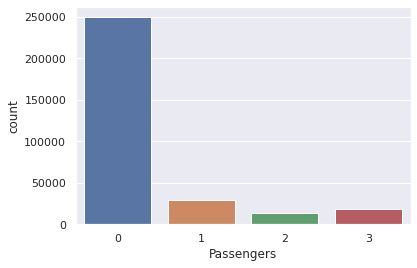

In [ ]:
# overall
sns.countplot(x='Passengers',data=X)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


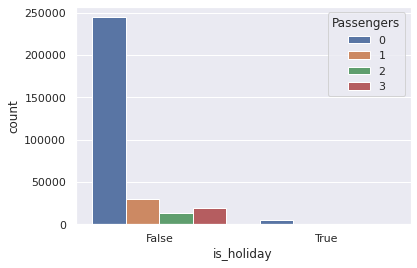

In [ ]:
# holiday
sns.countplot('is_holiday',data=X, hue='Passengers')

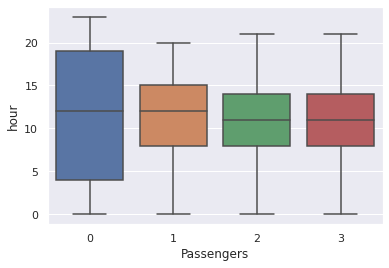

In [ ]:
# hour
sns.boxplot(x="Passengers", y="hour", data=X)

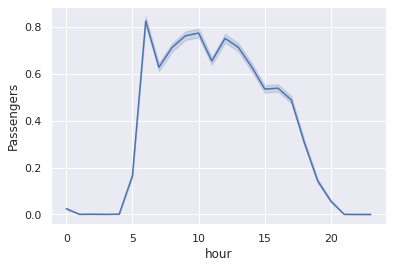

In [ ]:
#hour
sns.lineplot(y="Passengers", x="hour", data=X)

([<matplotlib.axis.XTick at 0x7f9818ed2100>,
 [Text(0, 0, 'Monday'),
  Text(0, 0, 'Tuesday'),
  Text(0, 0, 'Wednesday'),
  Text(0, 0, 'Thursday'),
  Text(0, 0, 'Friday'),
  Text(0, 0, 'Saturday'),
  Text(0, 0, 'Sunday')])

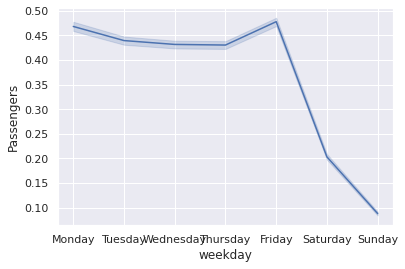

In [ ]:
#weekday
sns.lineplot(y="Passengers", x="weekday", data=X)
plt.xticks([0,1,2,3,4,5,6],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])


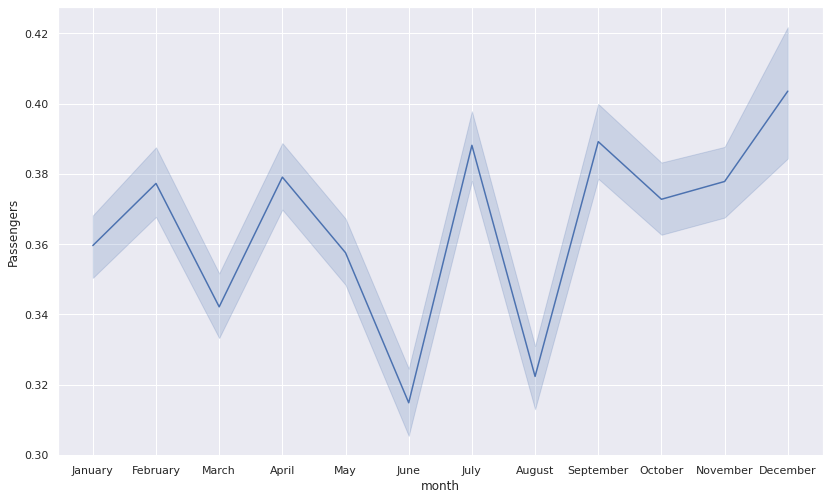

In [ ]:
#month
tempdf = X
def month(row):
  time = datetime.datetime.strptime(row.date,"%Y-%m-%d")
  return time.strftime("%B")

tempdf["month"] = tempdf.apply(lambda row: month(row), axis=1)
sns.set(rc={'figure.figsize':(13.7,8.27)})
sns.lineplot(y="Passengers", x="month", data=tempdf)
# tempdf

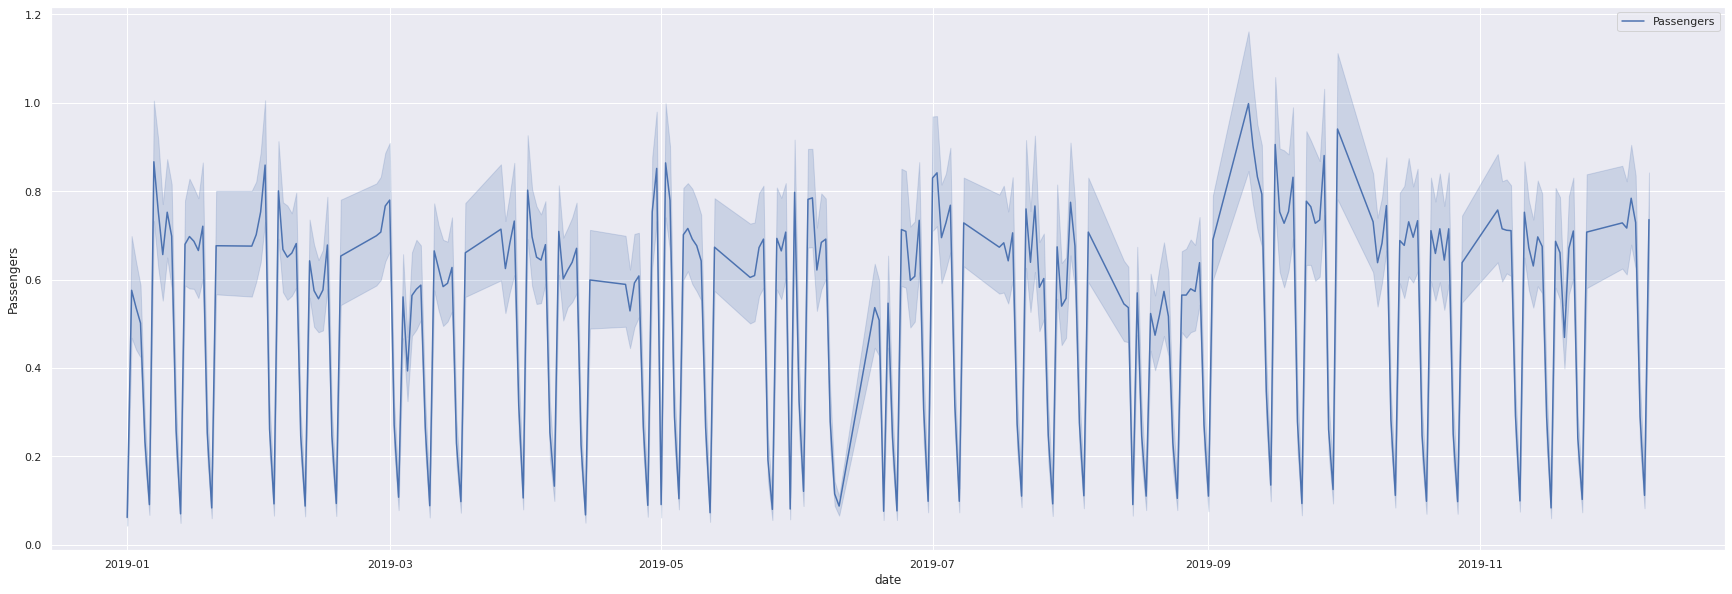

In [ ]:
sns.set(rc={'figure.figsize':(30,10)})
sns.lineplot(x=regular_travel.date, y=regular_travel['Passengers'])
plt.legend(['Passengers'])

In [ ]:
t = regular_travel.groupby("date").agg({"Passengers": "sum"})
t

,Passengers
date,
2019-01-01,74.0
2019-01-02,691.0
2019-01-03,644.0
2019-01-04,602.0
2019-01-05,280.0
...,...
2019-12-12,0.0
2019-12-13,0.0
2019-12-14,0.0


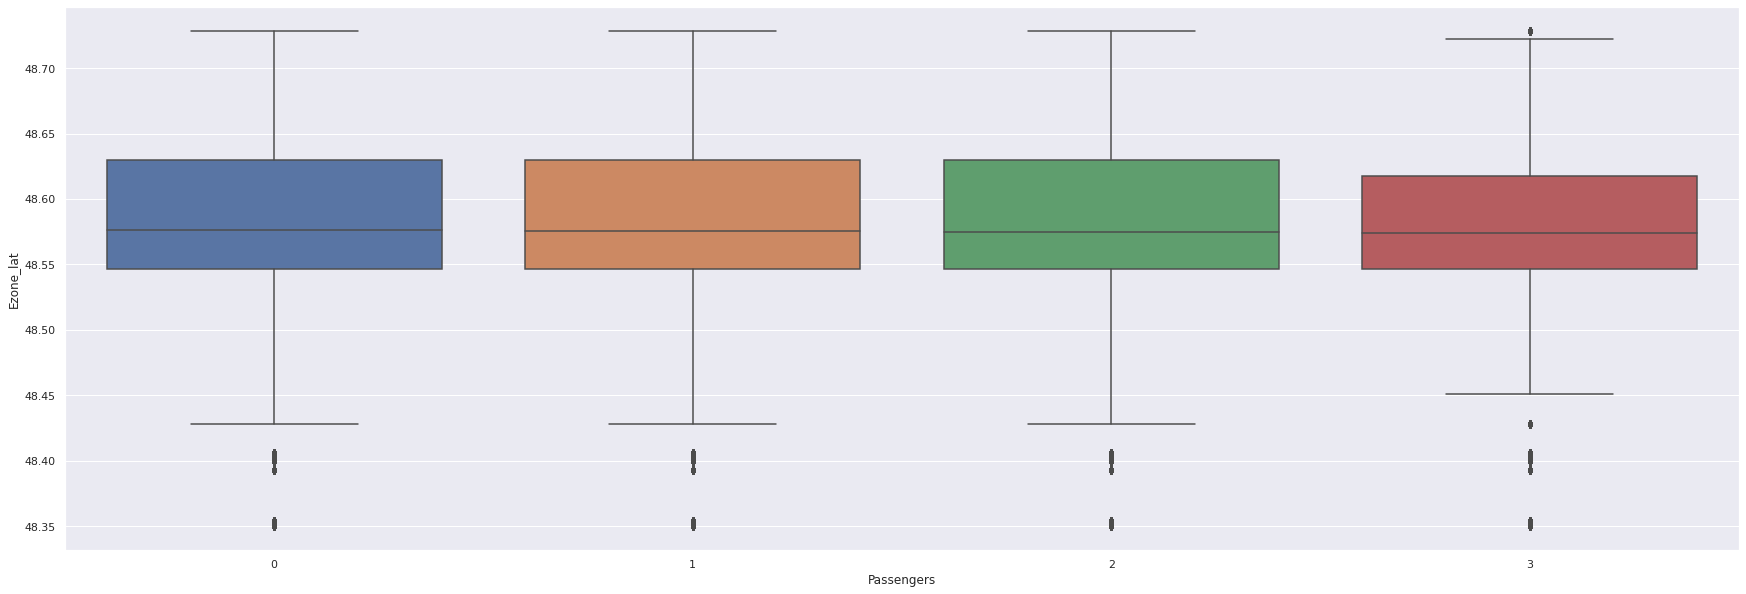

In [ ]:
# Ezone_lat
sns.boxplot(x="Passengers", y="Ezone_lat", data=X)

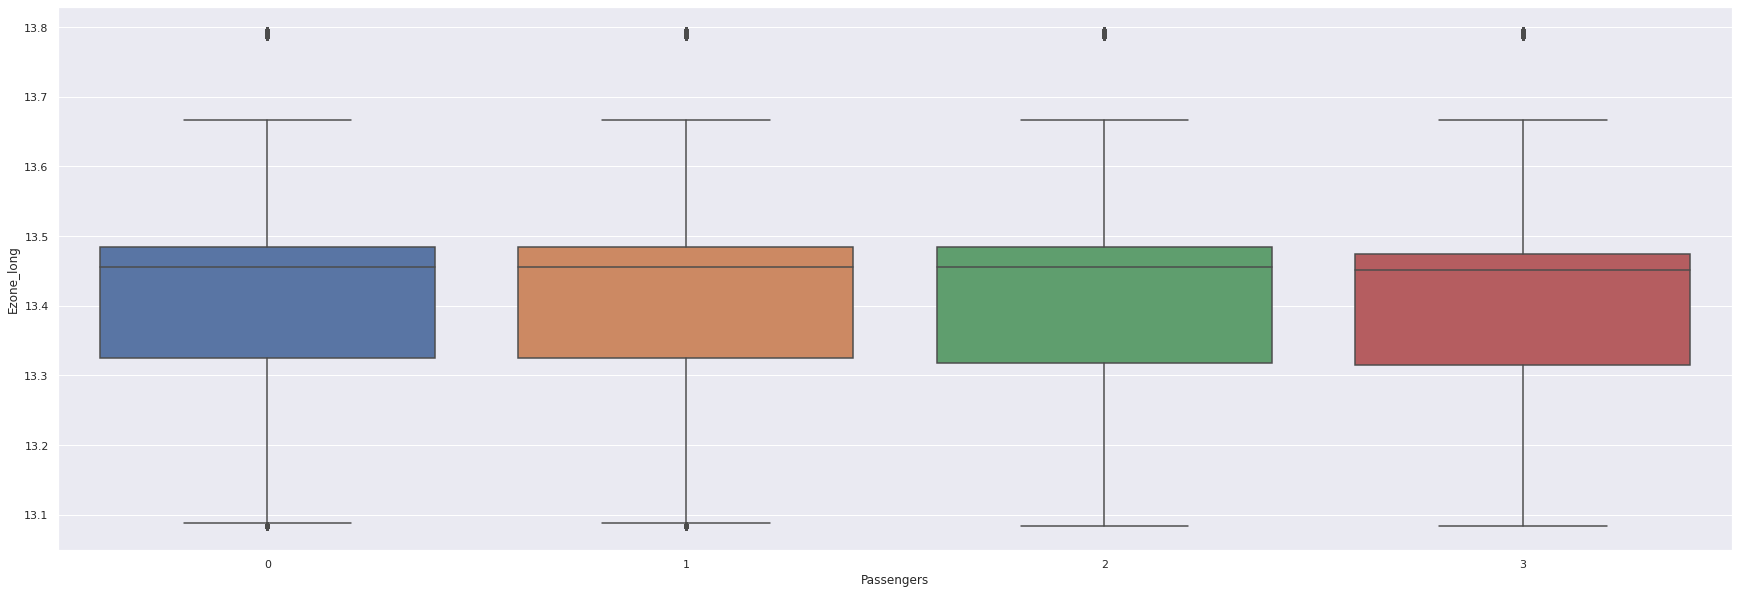

In [ ]:
# Ezone_long
sns.boxplot(x="Passengers", y="Ezone_long", data=X)

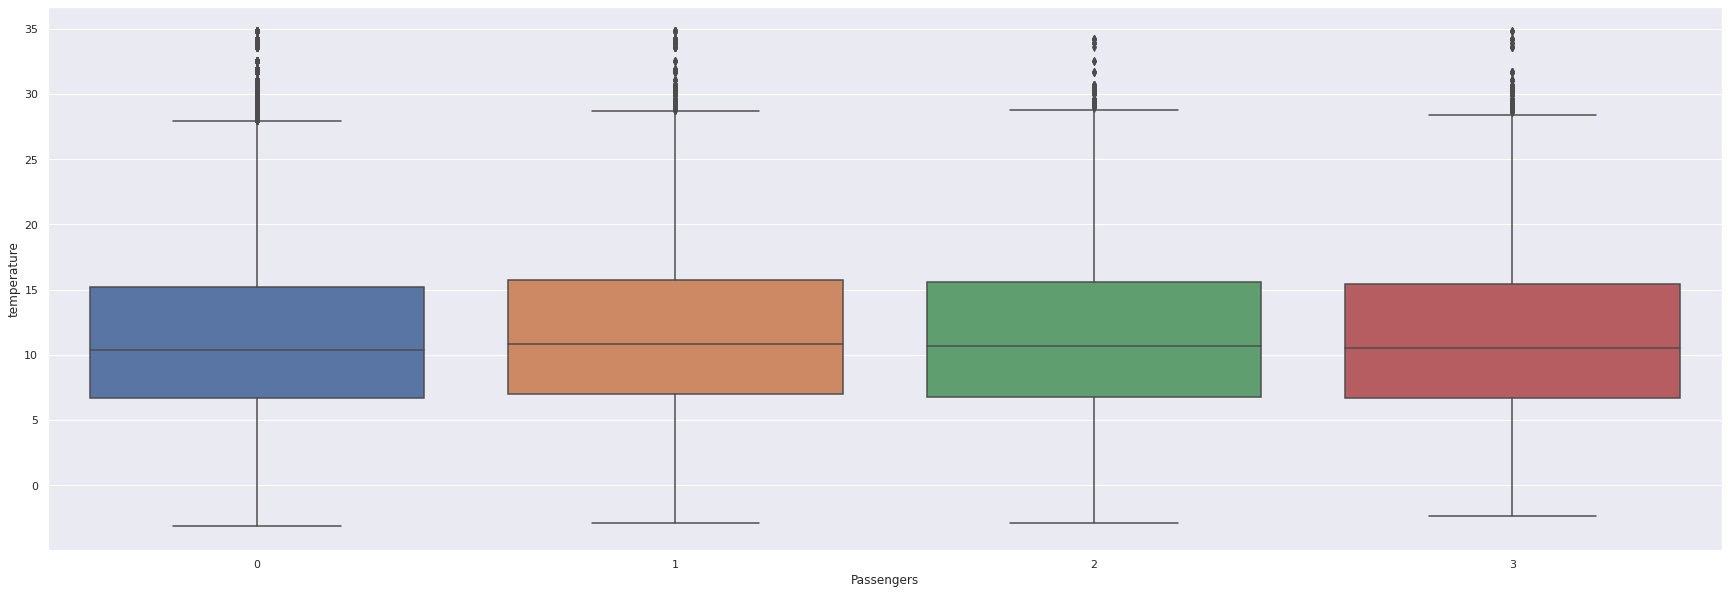

In [ ]:
# temperature
sns.boxplot(x="Passengers", y="temperature", data=X)

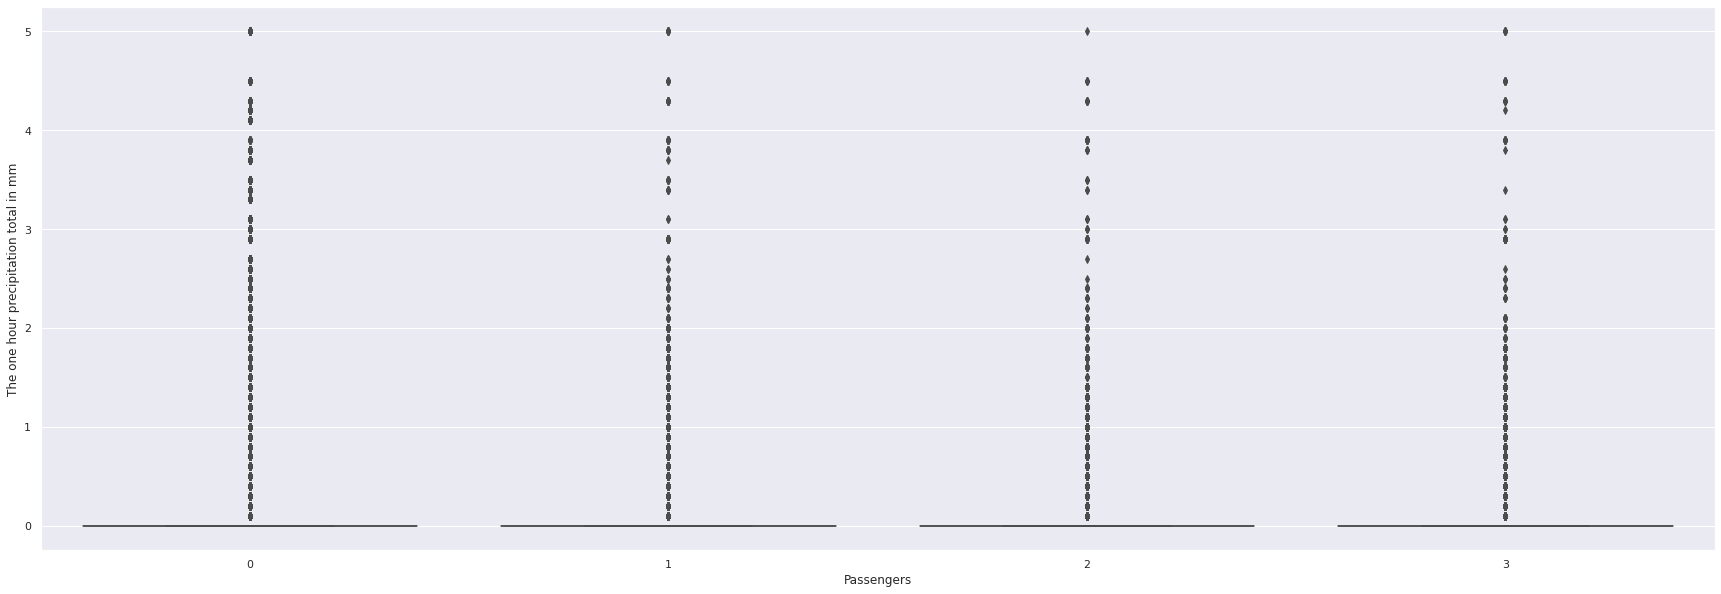

In [ ]:
# The one hour precipitation total in mm
sns.boxplot(x="Passengers", y="The one hour precipitation total in mm", data=X)

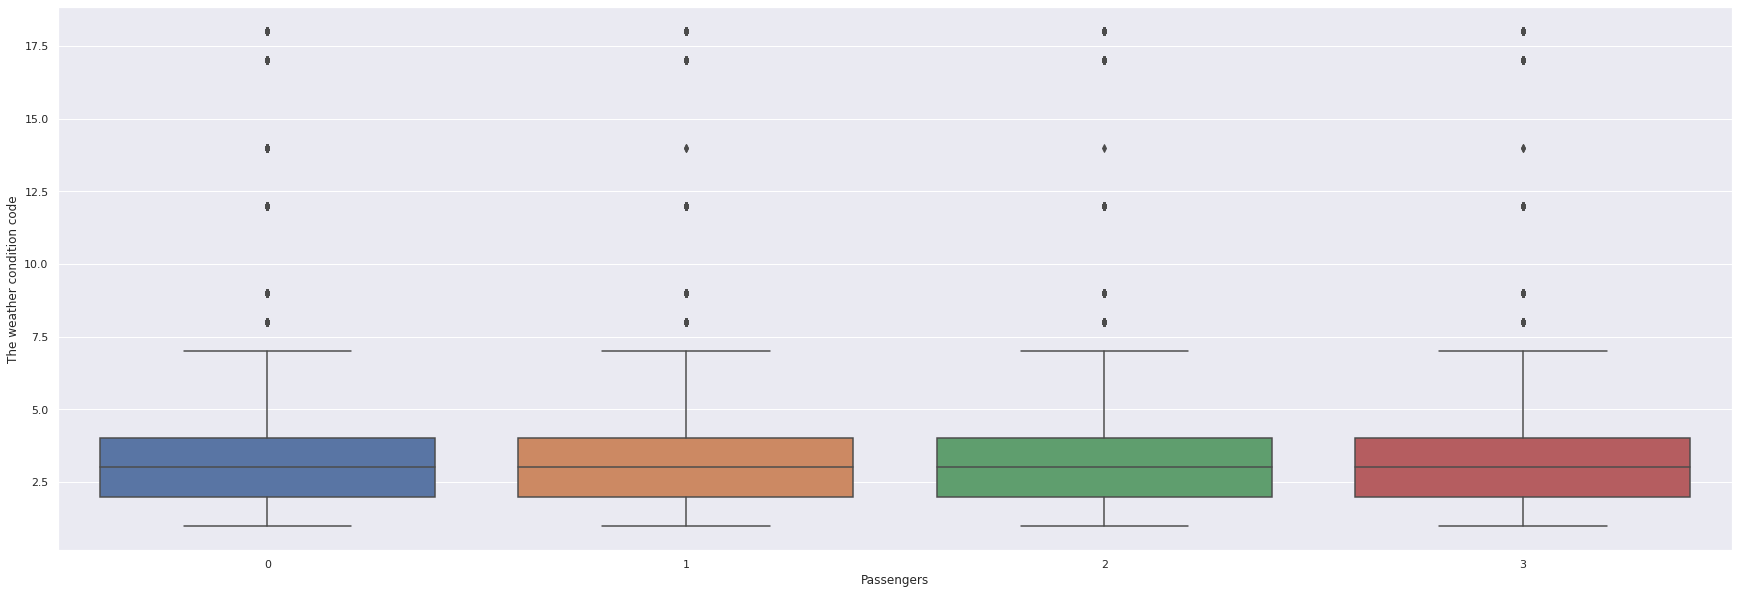

In [ ]:
# The weather condition code
sns.boxplot(x="Passengers", y="The weather condition code", data=X)

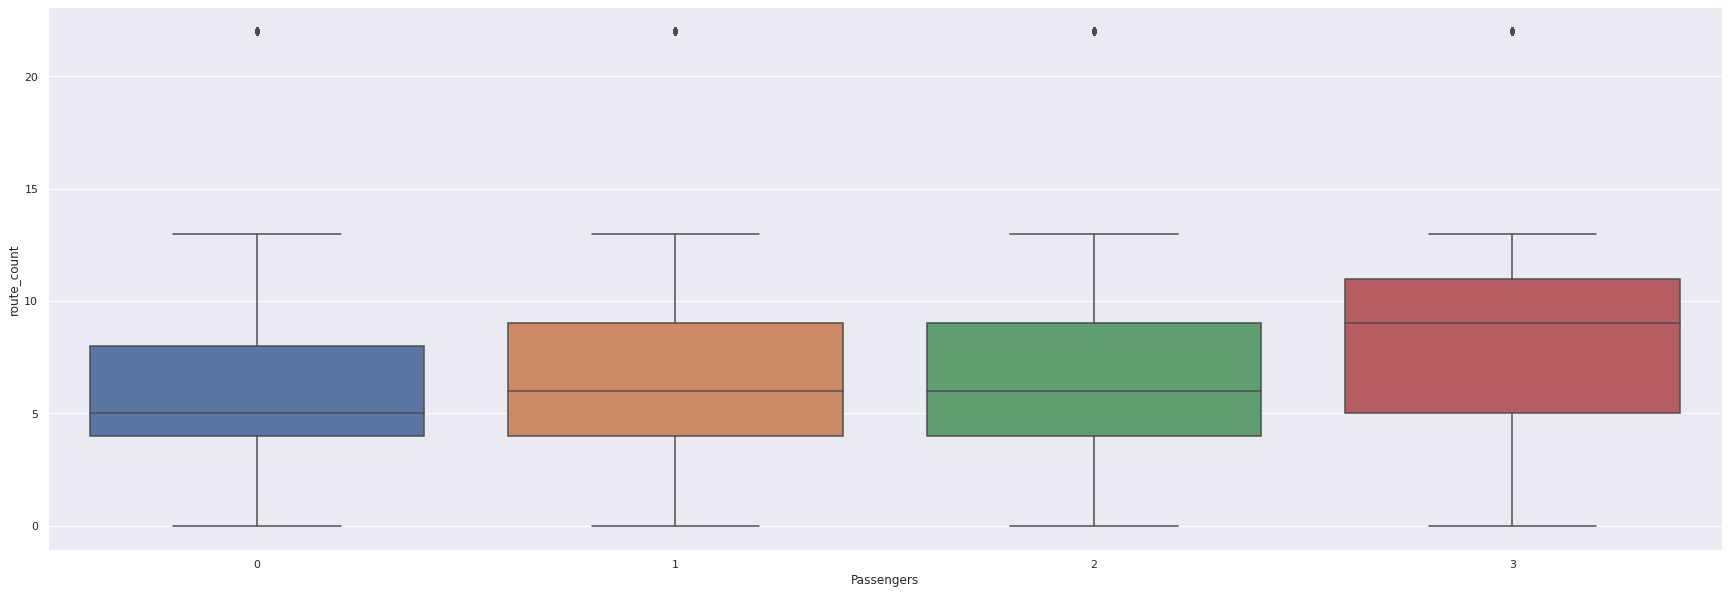

In [ ]:
# route count
sns.boxplot(x="Passengers", y="route_count", data=X)

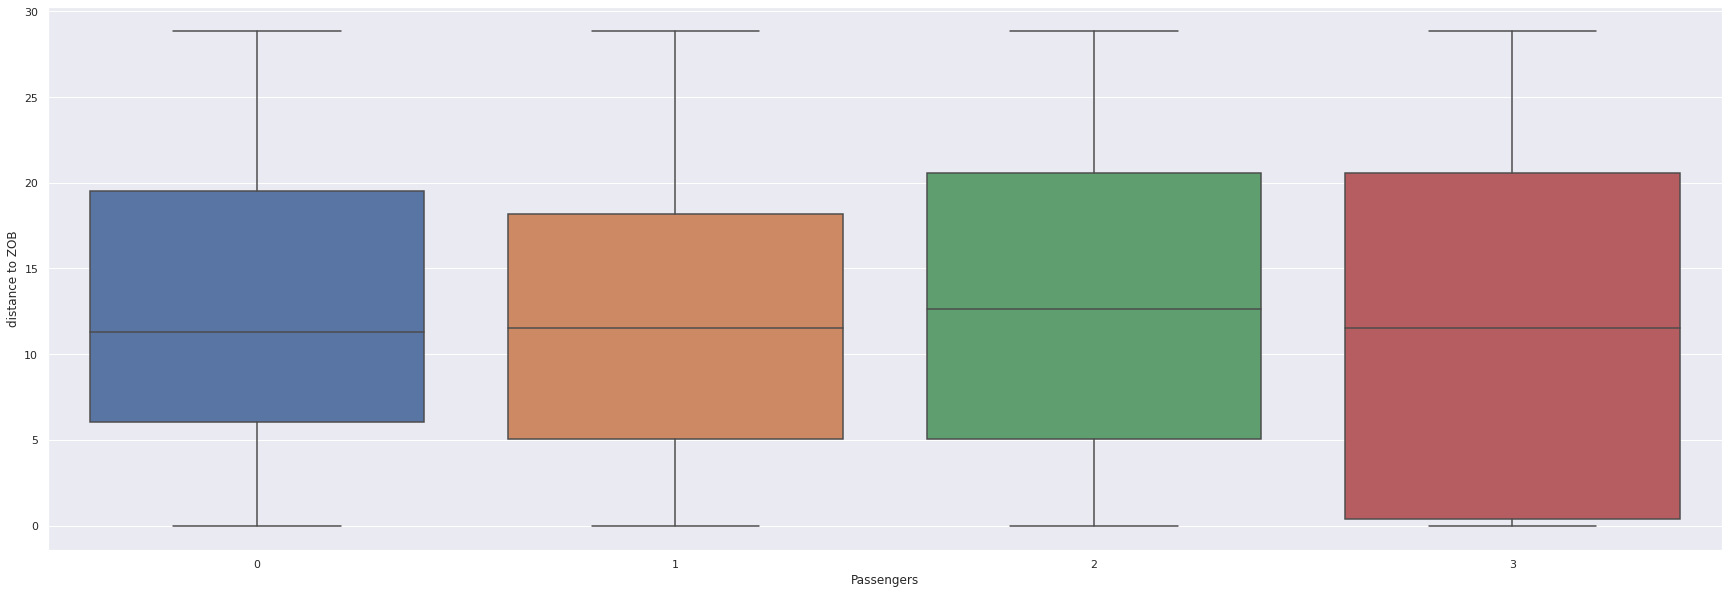

In [ ]:
# distance to ZOB
sns.boxplot(x="Passengers", y="distance to ZOB", data=X)

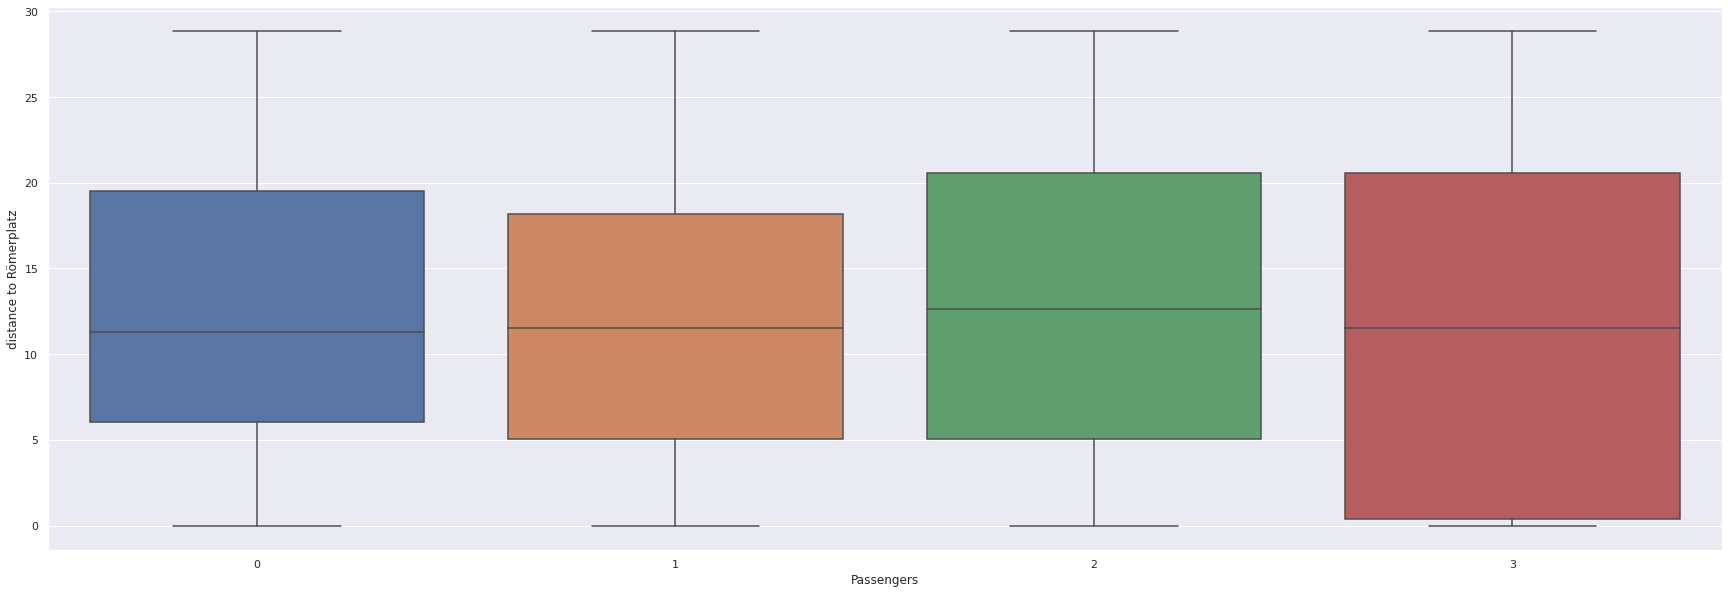

In [ ]:
# distance to Römerplatz
sns.boxplot(x="Passengers", y="distance to Römerplatz", data=X)

# Correlation

In [ ]:
X = X_train

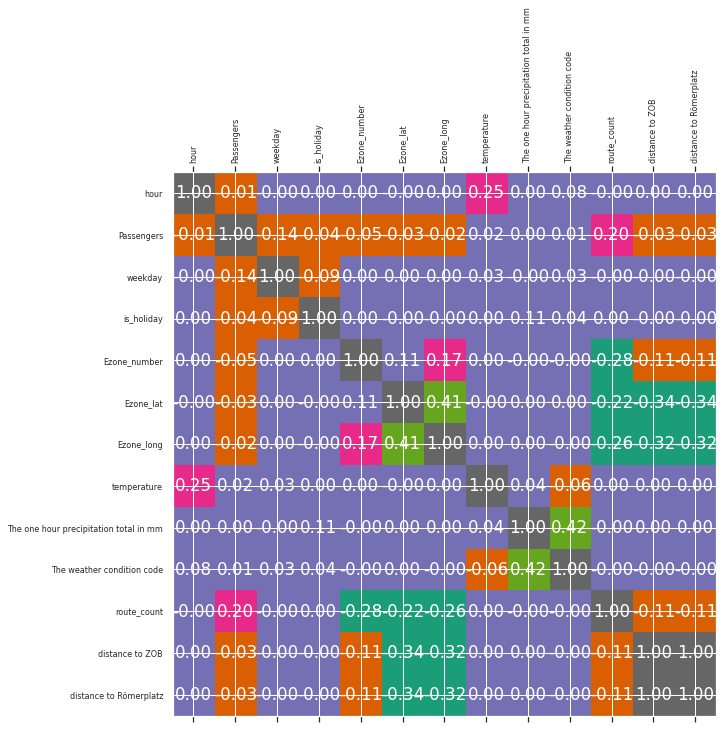

In [ ]:
f ,ax= plt.subplots()
a = X.corr()
plt.xticks(range(a.shape[1]), a.columns, fontsize=8, rotation=90)
plt.yticks(range(a.shape[1]), a.columns, fontsize=8)
im = ax.matshow(a,cmap='Dark2')

ax.set_xticks(np.arange(len(a.columns)))
ax.set_yticks(np.arange(len(a.columns)))

for i,c in enumerate(a.columns):
    for j,h in enumerate(a.columns):
        text = ax.text(j, i, "%0.2f"%a[c][h],
                       ha="center", va="center", color="w")

plt.gcf().set_size_inches(10,10)
plt.show()

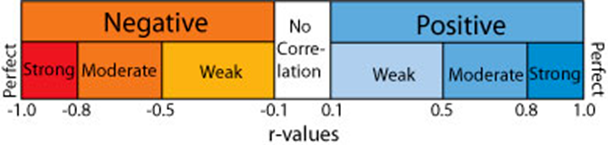

TypeError: ignored

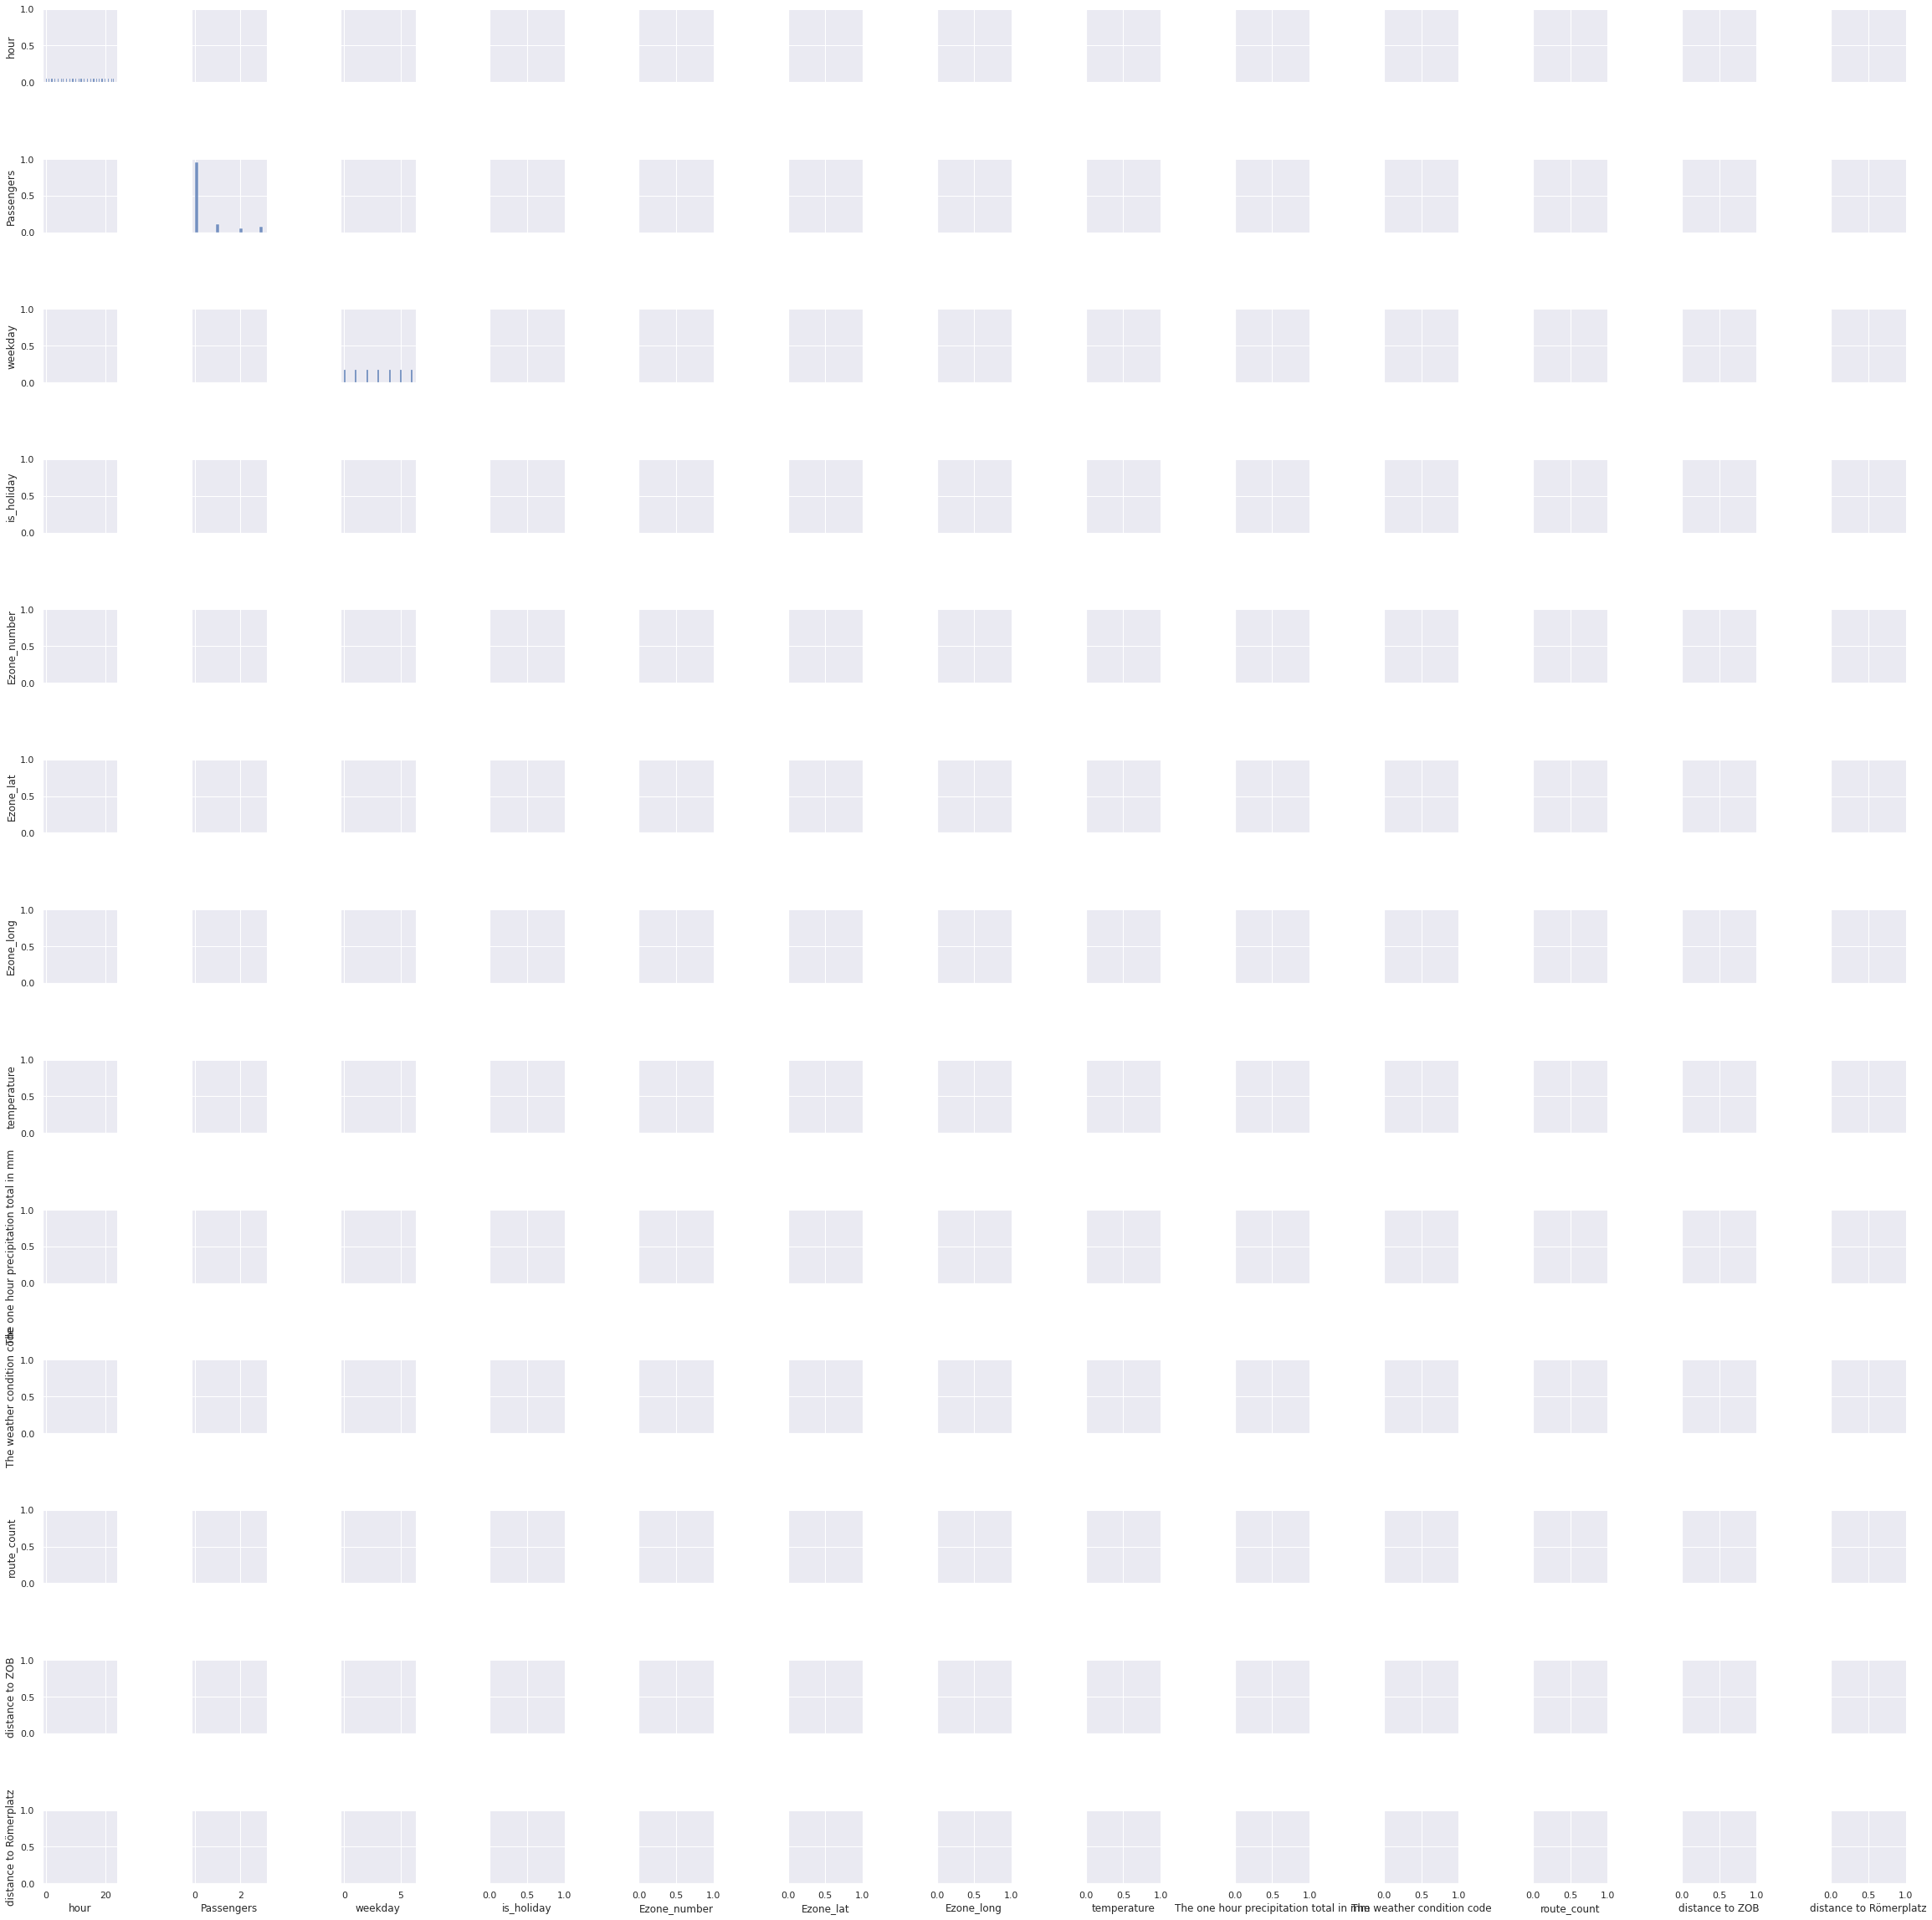

In [ ]:
sns.pairplot(X)

# PCA

In [ ]:
# one hot vector - is not worth it. decided to go with dayoftheyear

cols_to_transform = ['date']
df_with_dummies = pd.get_dummies(X ,columns = cols_to_transform )
for col in ['Passengers']:
    df_with_dummies[col] = X[col].apply(lambda x:np.unique(X[col].tolist()).tolist().index(x))


X = df_with_dummies.loc[:, df_with_dummies.columns != 'Passengers']
X

,hour,weekday,is_holiday,Ezone_number,Ezone_lat,Ezone_long,temperature,The one hour precipitation total in mm,The weather condition code,route_count,...,date_2019-11-23,date_2019-11-24,date_2019-11-25,date_2019-12-03,date_2019-12-04,date_2019-12-05,date_2019-12-06,date_2019-12-07,date_2019-12-08,date_2019-12-09
0,0,1,True,15964,48.604788,13.483832,7.8,0.0,4,6,...,0,0,0,0,0,0,0,0,0,0
1,1,1,True,15964,48.604788,13.483832,6.9,0.0,4,6,...,0,0,0,0,0,0,0,0,0,0
2,2,1,True,15964,48.604788,13.483832,6.6,0.0,4,6,...,0,0,0,0,0,0,0,0,0,0
3,3,1,True,15964,48.604788,13.483832,6.2,0.0,4,6,...,0,0,0,0,0,0,0,0,0,0
4,4,1,True,15964,48.604788,13.483832,5.9,0.0,3,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310995,19,0,False,9750,48.574233,13.450428,4.0,0.0,2,1,...,0,0,0,0,0,0,0,0,0,1
310996,20,0,False,9750,48.574233,13.450428,3.5,0.0,2,1,...,0,0,0,0,0,0,0,0,0,1
310997,21,0,False,9750,48.574233,13.450428,2.7,0.0,1,1,...,0,0,0,0,0,0,0,0,0,1
310998,22,0,False,9750,48.574233,13.450428,2.1,0.0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# dayoftheyear
df = X
def day_of_year(row):
  time = datetime.datetime.strptime(row.date,"%Y-%m-%d")
  return time.timetuple().tm_yday 

df["date"] = df.apply(lambda row: day_of_year(row), axis=1)
df

In [ ]:
x = StandardScaler().fit_transform(df)
pca = PCA(n_components=13)

for i in range(0,13):
    pca.n_components = i
    pca.fit(df)
    variance = pca.explained_variance_.tolist()
    print(i,(variance))


plt.figure()
plt.plot(variance)
plt.xlabel('Component')
plt.ylabel('Variance') #for each component
plt.show()

# split data into train and test

In [ ]:
# regular_travel = pd.read_csv('/content/drive/MyDrive/Preproccessed_regular_travel.csv', parse_dates=['date'], sep='\t')
regular_travel = pd.read_csv('/content/drive/MyDrive/Preproccessed_on_demand.csv', parse_dates=['date'], sep='\t')

regular_travel = regular_travel.drop(columns = ['Unnamed: 0'])

X_train = regular_travel.dropna(subset = ['Passengers'])

Y_train = np.digitize(X_train.Passengers, bins=(1, 2, 3))
X_train['Passengers'] = np.digitize(X_train.Passengers, bins=(1, 2, 3))

In [ ]:
X

In [ ]:
regular_travel_test = pd.read_csv('/content/drive/MyDrive/Preproccessed_on_demand_test.csv', parse_dates=['date'], sep='\t')

regular_travel_test = regular_travel_test.drop(columns = ['Unnamed: 0'])

X_test = regular_travel_test.dropna(subset = ['Passengers'])

Y_test = np.digitize(X_test.Passengers, bins=(1, 2, 3))
X_test['Passengers'] = np.digitize(X_test.Passengers, bins=(1, 2, 3))

In [ ]:

X_train["month"] = X_train.apply(lambda row: row.date.month, axis=1)
X_test["month"] = X_test.apply(lambda row: row.date.month, axis=1)




In [ ]:
def day_of_year(row):
  return row.date.timetuple().tm_yday 

X_train["day_of_year"] = X_train.apply(lambda row: day_of_year(row), axis=1)
X_test["day_of_year"] = X_test.apply(lambda row: day_of_year(row), axis=1)

In [ ]:
X_train = X_train.drop(columns = ['Passengers','distance to Römerplatz'])
X_test = X_test.drop(columns = ['Passengers','distance to Römerplatz'])

In [ ]:
X_train = X_train.drop(columns = ['date','distance to Römerplatz'])
X_test = X_test.drop(columns = ['date','distance to Römerplatz'])

In [ ]:
X_train = X_train.drop(columns = ['Passengers'])
X_test = X_test.drop(columns = ['Passengers'])

In [ ]:
X_train["is_holiday"] = X_train["is_holiday"].astype(int)
X_test["is_holiday"] = X_test["is_holiday"].astype(int)

In [ ]:
X_test

# timeseries to supervised

In [ ]:
def fix_hour(row):
  return row.date.replace(hour=row.hour)

X_train["date"] = X_train.apply(lambda row: fix_hour(row), axis=1)
X_test["date"] = X_test.apply(lambda row: fix_hour(row), axis=1)

In [ ]:
HORIZON  = 12

for t in range(1, HORIZON+1):
  X_train['Passengers+'+str(t)] = X_train.groupby('Ezone_number')['Passengers'].shift(-t, fill_value=0)

for t in range(1, HORIZON+1):
  X_test['Passengers+'+str(t)] = X_test.groupby('Ezone_number')['Passengers'].shift(-t, fill_value=0)

KeyError: ignored

In [ ]:
HORIZON  = 12

for t in range(1, HORIZON+1):
  X_train['Passengers+'+str(t)] = X_train.groupby('EZone')['Passengers'].shift(-t, fill_value=0)

for t in range(1, HORIZON+1):
  X_test['Passengers+'+str(t)] = X_test.groupby('EZone')['Passengers'].shift(-t, fill_value=0)

In [ ]:
# dayoftheyear

def day_of_year(row):
  # time = datetime.datetime.strptime(row.date,"%Y-%m-%d")
  return row.date.timetuple().tm_yday 

X_train["date"] = X_train.apply(lambda row: day_of_year(row), axis=1)
X_test["date"] = X_test.apply(lambda row: day_of_year(row), axis=1)

In [ ]:
# NORMALIZATION
cols = ['temperature','The one hour precipitation total in mm','route_count','distance to ZOB']
scaler = MinMaxScaler()
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.fit_transform(X_test[cols])

# Time Series split

In [ ]:
ezones = X_train.Ezone_number.unique()

In [ ]:
ezones = ezones[:1]
ezones

array([15964])

In [ ]:
def timeseries_split(x,window):

  split_dic = dict()
  for ezone in ezones:

    split_X = []
    ezone_data = x[x["Ezone_number"] == ezone]
    for i in range(12):
      temp_x = ezone_data[ezone_data['month'] == (i + 1)]
      first_of_month = temp_x["day_of_year"].iloc[0] 
      temp2_x = temp_x[(temp_x["day_of_year"] - first_of_month) <= window]
      split_X.append(temp2_x)

    split_dic[ezone] = split_X
  return split_dic





In [ ]:
split_X_train[0]

,hour,Passengers,weekday,is_holiday,Ezone_number,Ezone_lat,Ezone_long,temperature,The one hour precipitation total in mm,The weather condition code,route_count,distance to ZOB,month,day_of_year
0,0,0,1,True,15964,48.604788,13.483832,0.287599,0.0,4,0.272727,0.143575,1,1
1,1,0,1,True,15964,48.604788,13.483832,0.263852,0.0,4,0.272727,0.143575,1,1
2,2,0,1,True,15964,48.604788,13.483832,0.255937,0.0,4,0.272727,0.143575,1,1
3,3,0,1,True,15964,48.604788,13.483832,0.245383,0.0,4,0.272727,0.143575,1,1
4,4,0,1,True,15964,48.604788,13.483832,0.237467,0.0,3,0.272727,0.143575,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25195,19,0,0,False,9750,48.574233,13.450428,0.184697,0.0,4,0.045455,0.015423,1,21
25196,20,0,0,False,9750,48.574233,13.450428,0.187335,0.0,4,0.045455,0.015423,1,21
25197,21,0,0,False,9750,48.574233,13.450428,0.192612,0.0,4,0.045455,0.015423,1,21
25198,22,0,0,False,9750,48.574233,13.450428,0.197889,0.0,4,0.045455,0.015423,1,21


# supervised models

# Decision Tree vs adaboost vs randomforest

In [ ]:
def objective_decision_tree(trial):
    
    
    model = create_decision_tree_model(trial)

    
    
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    cats = np.array(Y_test)
    predictions = np.array(y_pred)
    accuracy = f1_score(cats, predictions, average = 'macro')
    return accuracy

def objective_adaboost(trial):
    
    
    model = create_adaboost_model(trial)
    
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    cats = np.array(Y_test)
    predictions = np.array(y_pred)
    accuracy = f1_score(cats, predictions, average ='macro')
    return accuracy

def objective_random_forest(trial):
    
    
    model = create_random_forest_model(trial)
    
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    cats = np.array(Y_test)
    predictions = np.array(y_pred)
    accuracy = f1_score(cats, predictions, average = 'macro')
    return accuracy

In [ ]:
def create_decision_tree_model(trial):

  n_depth = trial.suggest_int('n_depth', 1, 128)
  return DecisionTreeClassifier(max_depth=n_depth,class_weight='balanced')

def create_adaboost_model(trial):

  n_depth = trial.suggest_int('n_depth', 1, 10)
  n_estimators = trial.suggest_int('n_estimators', 10, 100)
  return AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=n_depth,class_weight='balanced'), n_estimators=n_estimators)

def create_random_forest_model(trial):

  n_depth = trial.suggest_int('n_depth', 1, 10)
  n_estimators = trial.suggest_int('n_estimators', 10, 100)
  return RandomForestClassifier(n_estimators=n_estimators, max_depth=n_depth,class_weight='balanced')

In [ ]:
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(), pruner=optuna.pruners.HyperbandPruner())
study.optimize(objective_decision_tree, n_trials=20)
pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])
plot_optimization_history(study)

[I 2023-01-31 14:21:15,422] A new study created in memory with name: no-name-96e6a6f1-9309-4108-ab49-b4a61a4bfc64
[I 2023-01-31 14:21:19,337] Trial 0 finished with value: 0.397946243894316 and parameters: {'n_depth': 86}. Best is trial 0 with value: 0.397946243894316.
[I 2023-01-31 14:21:22,966] Trial 1 finished with value: 0.4016657652306571 and parameters: {'n_depth': 29}. Best is trial 1 with value: 0.4016657652306571.
[I 2023-01-31 14:21:26,473] Trial 2 finished with value: 0.4024783452564325 and parameters: {'n_depth': 23}. Best is trial 2 with value: 0.4024783452564325.
[I 2023-01-31 14:21:30,175] Trial 3 finished with value: 0.4002598524238665 and parameters: {'n_depth': 117}. Best is trial 2 with value: 0.4024783452564325.
[I 2023-01-31 14:21:33,825] Trial 4 finished with value: 0.40083551390802685 and parameters: {'n_depth': 78}. Best is trial 2 with value: 0.4024783452564325.
[I 2023-01-31 14:21:37,617] Trial 5 finished with value: 0.40000861720334613 and parameters: {'n_dept

In [ ]:
decision_tree = create_decision_tree_model(study.best_trial)

In [ ]:
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(), pruner=optuna.pruners.HyperbandPruner())
study.optimize(objective_adaboost, n_trials=10)
pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])
plot_optimization_history(study)

[I 2023-01-31 14:22:22,565] A new study created in memory with name: no-name-3afc641e-7ce8-4693-84cd-91351043ace1
[I 2023-01-31 14:25:31,220] Trial 0 finished with value: 0.4052384016688804 and parameters: {'n_depth': 9, 'n_estimators': 71}. Best is trial 0 with value: 0.4052384016688804.
[I 2023-01-31 14:27:06,597] Trial 1 finished with value: 0.4273084237100466 and parameters: {'n_depth': 3, 'n_estimators': 60}. Best is trial 1 with value: 0.4273084237100466.
[I 2023-01-31 14:28:33,064] Trial 2 finished with value: 0.40988478184116933 and parameters: {'n_depth': 1, 'n_estimators': 70}. Best is trial 1 with value: 0.4273084237100466.
[I 2023-01-31 14:31:25,179] Trial 3 finished with value: 0.41458256065559895 and parameters: {'n_depth': 7, 'n_estimators': 71}. Best is trial 1 with value: 0.4273084237100466.
[I 2023-01-31 14:34:48,339] Trial 4 finished with value: 0.41164778103650146 and parameters: {'n_depth': 8, 'n_estimators': 83}. Best is trial 1 with value: 0.4273084237100466.
[I 

In [ ]:
adaboost = create_adaboost_model(study.best_trial)

In [ ]:
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(), pruner=optuna.pruners.HyperbandPruner())
study.optimize(objective_random_forest, n_trials=10)
pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])
plot_optimization_history(study)

[I 2023-01-31 14:40:10,168] A new study created in memory with name: no-name-48956dc8-3160-4c8a-8be2-9eae0db6f8f9
[I 2023-01-31 14:40:15,498] Trial 0 finished with value: 0.39982877987387255 and parameters: {'n_depth': 2, 'n_estimators': 37}. Best is trial 0 with value: 0.39982877987387255.
[I 2023-01-31 14:40:25,298] Trial 1 finished with value: 0.39877464790995204 and parameters: {'n_depth': 3, 'n_estimators': 74}. Best is trial 0 with value: 0.39982877987387255.
[I 2023-01-31 14:40:47,950] Trial 2 finished with value: 0.4218682745807721 and parameters: {'n_depth': 8, 'n_estimators': 89}. Best is trial 2 with value: 0.4218682745807721.
[I 2023-01-31 14:40:54,622] Trial 3 finished with value: 0.36673934782812734 and parameters: {'n_depth': 1, 'n_estimators': 82}. Best is trial 2 with value: 0.4218682745807721.
[I 2023-01-31 14:40:58,762] Trial 4 finished with value: 0.4187154175268774 and parameters: {'n_depth': 9, 'n_estimators': 12}. Best is trial 2 with value: 0.4218682745807721.
[

In [ ]:
random_forest = create_random_forest_model(study.best_trial)

Tree accuracy is 0.63804
Misclassified samples: 39526
              precision    recall  f1-score   support

           0       0.97      0.69      0.80     88868
           1       0.17      0.42      0.24      9726
           2       0.11      0.34      0.16      4397
           3       0.36      0.52      0.42      6209

    accuracy                           0.64    109200
   macro avg       0.40      0.49      0.41    109200
weighted avg       0.83      0.64      0.71    109200



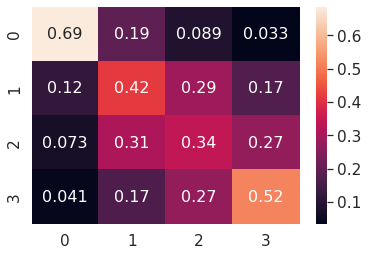

Tree accuracy is 0.65386
Misclassified samples: 37799
              precision    recall  f1-score   support

           0       0.98      0.70      0.81     88868
           1       0.18      0.46      0.26      9726
           2       0.12      0.29      0.17      4397
           3       0.39      0.62      0.48      6209

    accuracy                           0.65    109200
   macro avg       0.42      0.52      0.43    109200
weighted avg       0.84      0.65      0.72    109200



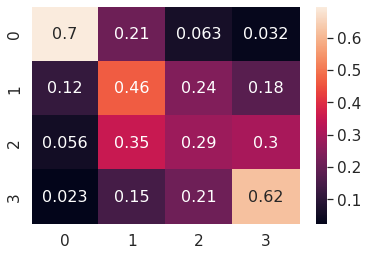

Tree accuracy is 0.64744
Misclassified samples: 38500
              precision    recall  f1-score   support

           0       0.97      0.69      0.80     88868
           1       0.17      0.51      0.26      9726
           2       0.13      0.24      0.17      4397
           3       0.40      0.58      0.47      6209

    accuracy                           0.65    109200
   macro avg       0.42      0.50      0.42    109200
weighted avg       0.83      0.65      0.71    109200



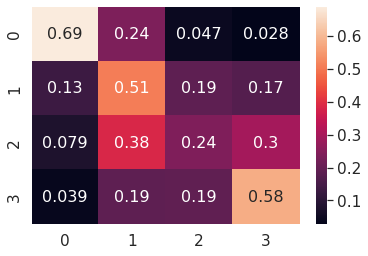

                        Accuracy
DecisionTree            0.638040
AdaBoostClassifier      0.653855
RandomForestClassifier  0.647436


In [ ]:

models = {'DecisionTree':decision_tree
        , 'AdaBoostClassifier':adaboost
        , 'RandomForestClassifier':random_forest
        }
scores = {}

for name, model in models.items():

    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    
    cats = np.array(Y_test)
    predictions = np.array(y_pred)
    accuracy = accuracy_score(cats, predictions)
    print("Tree accuracy is {:.5f}".format(accuracy))
    print('Misclassified samples: %d' % (Y_test != y_pred).sum())
    print(classification_report(Y_test, y_pred))

    cm = confusion_matrix(cats, predictions, normalize='true')

    sns.set(font_scale=1.4)
    sns.heatmap(cm, annot=True, annot_kws={"size": 16})
    plt.show()
    scores[name] = accuracy

table = pd.DataFrame.from_dict(scores,orient='index',columns=['Accuracy'])
print(table)

In [ ]:
from sklearn.inspection import permutation_importance

for name, model in models.items():
  perm_importance = permutation_importance(model, X_test, Y_test, scoring = 'f1_macro')
  sorted_idx = perm_importance.importances_mean.argsort()
  plt.plot(figsize=(10, 5))
  plt.barh(X_train.columns, perm_importance.importances_mean[sorted_idx])
  plt.xlabel(name + " Permutation Feature Importance")
  plt.show()

NameError: ignored

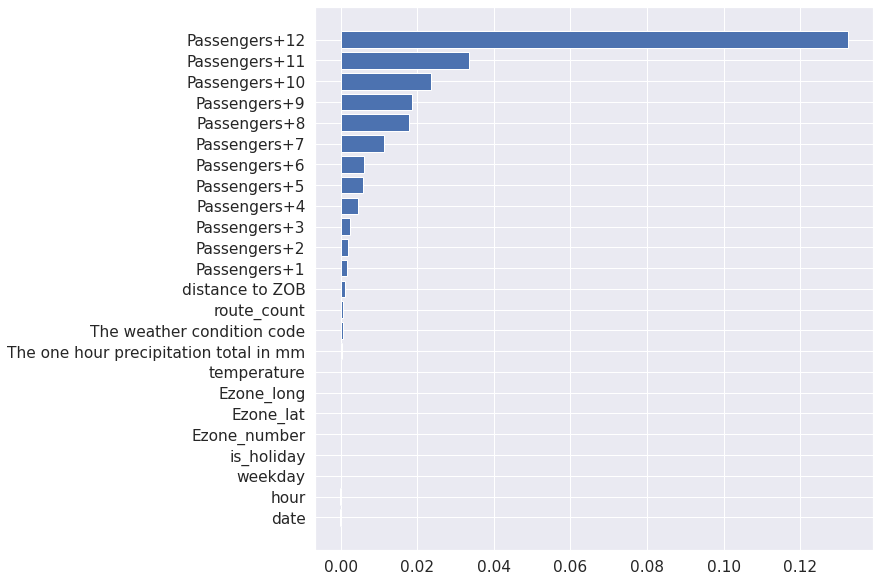

In [ ]:
perm_importance = permutation_importance(adaboost, X_test, Y_test, scoring = 'f1_macro')
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 10))
plt.barh(X_train.columns, perm_importance.importances_mean[sorted_idx])
# plt.xlabel(name + " Permutation Feature Importance")
plt.show()

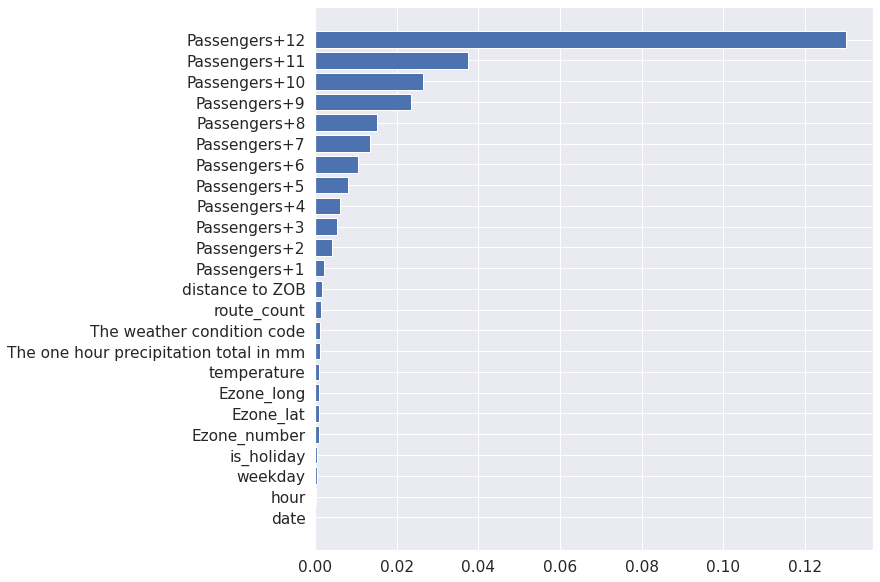

In [ ]:
perm_importance = permutation_importance(decision_tree, X_test, Y_test, scoring = 'f1_macro')
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 10))
plt.barh(X_train.columns, perm_importance.importances_mean[sorted_idx])
# plt.xlabel(name + " Permutation Feature Importance")
plt.show()

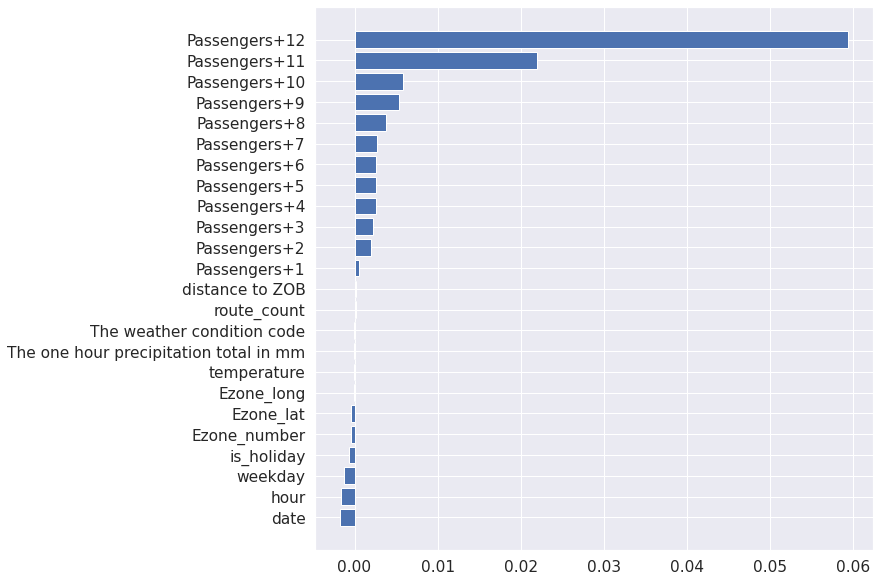

In [ ]:
perm_importance = permutation_importance(random_forest, X_test, Y_test, scoring ='f1_macro')
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 10))
plt.barh(X_train.columns, perm_importance.importances_mean[sorted_idx])
# plt.xlabel(name + " Permutation Feature Importance")
plt.show()

In [ ]:
for t in range(1, HORIZON+1):
  X_test['Passengers+'+str(t)] = 0


In [ ]:
split_X_train = timeseries_split(X_train,21)
split_X_test = timeseries_split(X_test,7)

print(len(split_X_train)== len(split_X_test))

True


Tree accuracy is 0.69461
Misclassified samples: 33349
              precision    recall  f1-score   support

           0       0.99      0.71      0.82    102130
           1       0.12      0.56      0.20      4692
           2       0.07      0.37      0.11      1471
           3       0.06      0.39      0.10       907

    accuracy                           0.69    109200
   macro avg       0.31      0.51      0.31    109200
weighted avg       0.93      0.69      0.78    109200



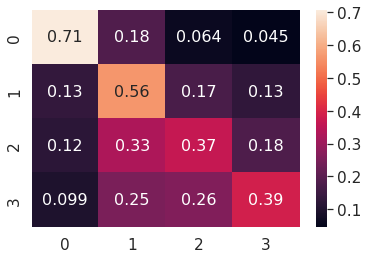

Tree accuracy is 0.59116
Misclassified samples: 44645
              precision    recall  f1-score   support

           0       0.99      0.60      0.75    102130
           1       0.08      0.52      0.14      4692
           2       0.06      0.33      0.10      1471
           3       0.05      0.50      0.09       907

    accuracy                           0.59    109200
   macro avg       0.29      0.49      0.27    109200
weighted avg       0.93      0.59      0.71    109200



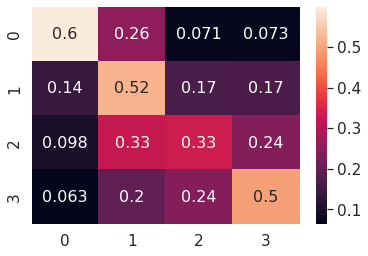

Tree accuracy is 0.53243
Misclassified samples: 51059
              precision    recall  f1-score   support

           0       0.99      0.53      0.69    102130
           1       0.07      0.63      0.13      4692
           2       0.05      0.25      0.08      1471
           3       0.06      0.36      0.10       907

    accuracy                           0.53    109200
   macro avg       0.29      0.44      0.25    109200
weighted avg       0.93      0.53      0.65    109200



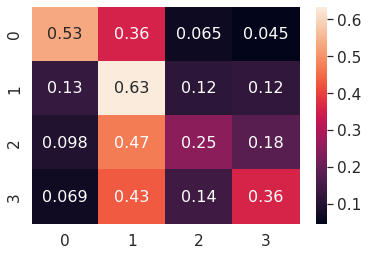

                        Accuracy
DecisionTree            0.694606
AdaBoostClassifier      0.591163
RandomForestClassifier  0.532427


In [ ]:
# on demand
models = {'DecisionTree':DecisionTreeClassifier(max_depth=18,class_weight='balanced')
        , 'AdaBoostClassifier':AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=3,class_weight='balanced'), n_estimators=45)
        , 'RandomForestClassifier':RandomForestClassifier(n_estimators=71, max_depth=10,class_weight='balanced')
        }
scores = {}

for name, model in models.items():

    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    cats = np.array(Y_test)
    predictions = np.array(y_pred)
    accuracy = accuracy_score(cats, predictions)
    print("Tree accuracy is {:.5f}".format(accuracy))
    print('Misclassified samples: %d' % (Y_test != y_pred).sum())
    print(classification_report(Y_test, y_pred))

    cm = confusion_matrix(cats, predictions, normalize='true')

    sns.set(font_scale=1.4)
    sns.heatmap(cm, annot=True, annot_kws={"size": 16})
    plt.show()
    scores[name] = accuracy

table = pd.DataFrame.from_dict(scores,orient='index',columns=['Accuracy'])
print(table)

Tree accuracy is 0.82934
Misclassified samples: 18636
              precision    recall  f1-score   support

           0       0.85      0.99      0.91     88868
           1       0.24      0.01      0.02      9726
           2       0.17      0.00      0.00      4397
           3       0.51      0.44      0.48      6209

    accuracy                           0.83    109200
   macro avg       0.44      0.36      0.35    109200
weighted avg       0.75      0.83      0.77    109200



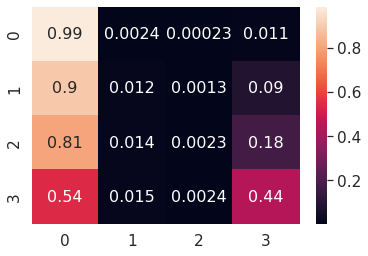

Tree accuracy is 0.83060
Misclassified samples: 18498
              precision    recall  f1-score   support

           0       0.86      0.98      0.92     88868
           1       0.28      0.02      0.04      9726
           2       0.14      0.00      0.01      4397
           3       0.48      0.54      0.51      6209

    accuracy                           0.83    109200
   macro avg       0.44      0.39      0.37    109200
weighted avg       0.76      0.83      0.78    109200



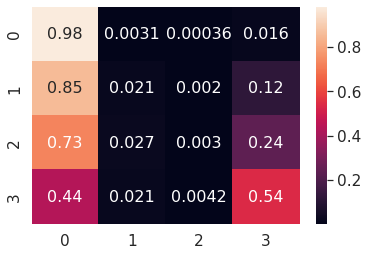

Tree accuracy is 0.82629
Misclassified samples: 18969
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     88868
           1       0.00      0.00      0.00      9726
           2       0.00      0.00      0.00      4397
           3       0.60      0.28      0.38      6209

    accuracy                           0.83    109200
   macro avg       0.36      0.32      0.32    109200
weighted avg       0.71      0.83      0.76    109200



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


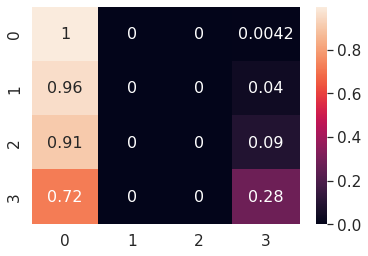

                        Accuracy
DecisionTree            0.829341
AdaBoostClassifier      0.830604
RandomForestClassifier  0.826291


In [ ]:

# models = {'DecisionTree':decision_tree
#         , 'AdaBoostClassifier':adaboost
#         , 'RandomForestClassifier':random_forest
#         }
scores = {}

for name, model in models.items():

    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    cats = np.array(Y_test)
    predictions = np.array(y_pred)
    accuracy = accuracy_score(cats, predictions)
    print("Tree accuracy is {:.5f}".format(accuracy))
    print('Misclassified samples: %d' % (Y_test != y_pred).sum())
    print(classification_report(Y_test, y_pred))

    cm = confusion_matrix(cats, predictions, normalize='true')

    sns.set(font_scale=1.4)
    sns.heatmap(cm, annot=True, annot_kws={"size": 16})
    plt.show()
    scores[name] = accuracy

table = pd.DataFrame.from_dict(scores,orient='index',columns=['Accuracy'])
print(table)

In [ ]:
filename = "/content/drive/MyDrive/decision_tree2.joblib"
joblib.dump(models['DecisionTree'], filename)
filename = "/content/drive/MyDrive/adaboost2.joblib"
joblib.dump(models['AdaBoostClassifier'], filename)
filename = "/content/drive/MyDrive/random_forest2.joblib"
joblib.dump(models['RandomForestClassifier'], filename)

['/content/drive/MyDrive/random_forest2.joblib']

In [ ]:

models = {'DecisionTree': joblib.load("/content/drive/MyDrive/decision_tree.joblib")
        , 'AdaBoostClassifier':joblib.load("/content/drive/MyDrive/adaboost.joblib")
        , 'RandomForestClassifier':joblib.load("/content/drive/MyDrive/random_forest.joblib")}

# SVM
forget about it

In [ ]:
SVM = SVC(kernel='poly', tol=1e-7, probability = True)
SVM.fit(X_train, Y_train)
y_pred = model.predict(X_test)
cats = np.array(Y_test)
predictions = np.array(y_pred)
accuracy = accuracy_score(cats, predictions)
print("Tree accuracy is {:.5f}".format(accuracy))
print('Misclassified samples: %d' % (Y_test != y_pred).sum())
print(classification_report(Y_test, y_pred))

cm = confusion_matrix(cats, predictions, normalize='true')

sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={"size": 16})
plt.show()

In [ ]:
SVM = LinearSVC()
SVM.fit(X_train, Y_train)
y_pred = model.predict(X_test)
cats = np.array(Y_test)
predictions = np.array(y_pred)
accuracy = accuracy_score(cats, predictions)
print("Tree accuracy is {:.5f}".format(accuracy))
print('Misclassified samples: %d' % (Y_test != y_pred).sum())
print(classification_report(Y_test, y_pred))

cm = confusion_matrix(cats, predictions, normalize='true')

sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={"size": 16})
plt.show()

# Naives Bayes

Tree accuracy is 0.75826
Misclassified samples: 26398
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     88868
           1       0.18      0.15      0.16      9726
           2       0.09      0.01      0.02      4397
           3       0.26      0.53      0.35      6209

    accuracy                           0.76    109200
   macro avg       0.35      0.39      0.35    109200
weighted avg       0.75      0.76      0.75    109200



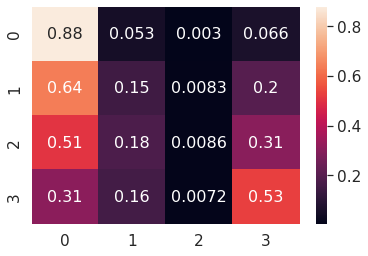

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
cats = np.array(Y_test)
predictions = np.array(y_pred)
accuracy = accuracy_score(cats, predictions)
print("Tree accuracy is {:.5f}".format(accuracy))
print('Misclassified samples: %d' % (Y_test != y_pred).sum())
print(classification_report(Y_test, y_pred))

cm = confusion_matrix(cats, predictions, normalize='true')

sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={"size": 16})
plt.show()

Tree accuracy is 0.84835
Misclassified samples: 16560
              precision    recall  f1-score   support

           0       0.94      0.90      0.92    102130
           1       0.07      0.07      0.07      4692
           2       0.03      0.05      0.03      1471
           3       0.03      0.14      0.05       907

    accuracy                           0.85    109200
   macro avg       0.27      0.29      0.27    109200
weighted avg       0.88      0.85      0.87    109200



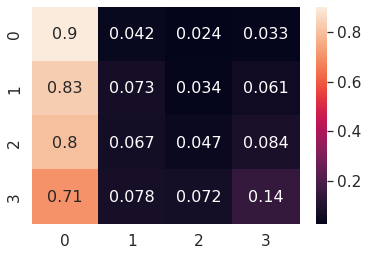

In [ ]:
# on demand
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
cats = np.array(Y_test)
predictions = np.array(y_pred)
accuracy = accuracy_score(cats, predictions)
print("Tree accuracy is {:.5f}".format(accuracy))
print('Misclassified samples: %d' % (Y_test != y_pred).sum())
print(classification_report(Y_test, y_pred))

cm = confusion_matrix(cats, predictions, normalize='true')

sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={"size": 16})
plt.show()

# SARIMAX

In [ ]:
def fix_hour(row):
  return row.date.replace(hour=row.hour)

X_train["date"] = X_train.apply(lambda row: fix_hour(row), axis=1)
X_test["date"] = X_test.apply(lambda row: fix_hour(row), axis=1)

In [ ]:
split_X_train = timeseries_split(X_train,21)
split_X_test = timeseries_split(X_test,7)

print(len(split_X_train)== len(split_X_test))

True


In [ ]:

split_X_train = split_X_train[4000]
split_X_test = split_X_test[4000]

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

HORIZON = 12
training_window = 7 * 24
order = (1, 1, 1) 
seasonal_order = (0, 1, 1, 24)
# model = SARIMAX(endog=split_X_train[0].Passengers, order=order, seasonal_order=seasonal_order)
y_pred = list()
y_test = list()
i = 0
ezones = [4000]
for ezone in ezones:
  print(i)
  i+=1
  print("training for ezone nr :"+str(ezone))
  model = SARIMAX(endog=split_X_train[ezone][0].Passengers, order=order, seasonal_order=seasonal_order)
  for train, test in zip(split_X_train[ezone],split_X_test[ezone]):
  
    model = model.clone(endog= train.Passengers)
    model_fit = model.fit(low_memory=True)
    
    yhat = model_fit.forecast(steps = len(test))
    y_pred.append(yhat)
    y_test.append(test.Passengers.tolist())




0
training for ezone nr :4000


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_mode

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

HORIZON = 12
training_window = 7 * 24
order = (1, 1, 1) 
seasonal_order = (0, 1, 1, 24)
# model = SARIMAX(endog=split_X_train[0].Passengers, order=order, seasonal_order=seasonal_order)
y_pred = list()
y_test = list()
i = 0
for ezone in ezones:
  print(i)
  i+=1
  print("training for ezone nr :"+str(ezone))
  model = SARIMAX(endog=split_X_train[ezone][0].Passengers, order=order, seasonal_order=seasonal_order)
  for train, test in zip(split_X_train[ezone],split_X_test[ezone]):
  
    model = model.clone(endog= train.Passengers)
    model_fit = model.fit(low_memory=True)
    
    yhat = model_fit.forecast(steps = len(test))
    y_pred.append(yhat)
    y_test.append(test.Passengers.tolist())




0
training for ezone nr :15964


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_mode

1
training for ezone nr :4000


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

2
training for ezone nr :4001


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

3
training for ezone nr :4010


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

4
training for ezone nr :4016


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

5
training for ezone nr :4028


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

6
training for ezone nr :4029


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

7
training for ezone nr :4030


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

8
training for ezone nr :4100


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

9
training for ezone nr :4111


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

10
training for ezone nr :4120


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

11
training for ezone nr :4146


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

12
training for ezone nr :4150


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

13
training for ezone nr :4170


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

14
training for ezone nr :4200


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

15
training for ezone nr :4214


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

16
training for ezone nr :4220


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

17
training for ezone nr :4225


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

18
training for ezone nr :4306


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

19
training for ezone nr :4380


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

20
training for ezone nr :4382


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

21
training for ezone nr :4471


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

22
training for ezone nr :4491


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

23
training for ezone nr :4563


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

24
training for ezone nr :4607


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

25
training for ezone nr :4614


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

26
training for ezone nr :4677


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

27
training for ezone nr :4794


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

28
training for ezone nr :4805


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

29
training for ezone nr :4806


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

30
training for ezone nr :4807


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

31
training for ezone nr :4809


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

32
training for ezone nr :4810


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

33
training for ezone nr :4815


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

34
training for ezone nr :4880


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

35
training for ezone nr :4881


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

36
training for ezone nr :4883


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

37
training for ezone nr :5381


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

38
training for ezone nr :5384


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

39
training for ezone nr :5387


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

40
training for ezone nr :5388


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

41
training for ezone nr :5396


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

42
training for ezone nr :5425


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

43
training for ezone nr :5444


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/

44
training for ezone nr :5455


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

45
training for ezone nr :5459


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

46
training for ezone nr :6462


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

47
training for ezone nr :7601


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

48
training for ezone nr :8766


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

49
training for ezone nr :9750


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dis

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

HORIZON = 12
training_window = 7 * 24
order = (1, 0, 1) 
seasonal_order = (0, 1, 1, 24)
# model = SARIMAX(endog=split_X_train[0].Passengers, order=order, seasonal_order=seasonal_order)
y_pred = list()
y_test = list()
i = 0
ezones = [4000]
for ezone in ezones:
  print(i)
  i+=1
  print("training for ezone nr :"+str(ezone))
  exog = split_X_train[ezone][0].loc[:, split_X_train[ezone][0].columns != 'Passengers'].to_numpy()
  model = SARIMAX(endog=split_X_train[ezone][0].Passengers,exog = exog, order=order, seasonal_order=seasonal_order)
  for train, test in zip(split_X_train[ezone],split_X_test[ezone]):
  
    model = model.clone(endog= train.Passengers,exog = train.loc[:, train.columns != 'Passengers'].to_numpy())
    model_fit = model.fit(low_memory=True)
    
    yhat = model_fit.forecast(steps = len(test),exog = test.loc[:, test.columns != 'Passengers'].to_numpy())
    y_pred.append(yhat)
    y_test.append(test.Passengers.tolist())




0
training for ezone nr :4000


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566

In [ ]:
split_X_train[4000][0].loc[:, split_X_train[4000][0].columns != 'Passengers'].to_numpy()

array([[0, 1, True, ..., 0.012759318002635023, 1, 1],
       [1, 1, True, ..., 0.012759318002635023, 1, 1],
       [2, 1, True, ..., 0.012759318002635023, 1, 1],
       ...,
       [21, 0, False, ..., 0.012759318002635023, 1, 21],
       [22, 0, False, ..., 0.012759318002635023, 1, 21],
       [23, 0, False, ..., 0.012759318002635023, 1, 21]], dtype=object)

Tree accuracy is 0.78552
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     74281
           1       0.18      0.20      0.19      8132
           2       0.09      0.04      0.06      3652
           3       0.84      0.00      0.01      5135

    accuracy                           0.79     91200
   macro avg       0.50      0.30      0.29     91200
weighted avg       0.77      0.79      0.75     91200



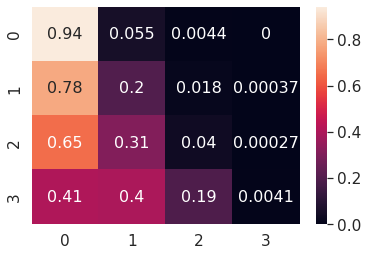

In [ ]:
# univariate d=0
cats = np.hstack(y_test)
predictions = np.hstack(y_pred)
predictions = np.digitize(predictions, bins=(1, 2, 3))
accuracy = accuracy_score(cats, predictions)
print("Tree accuracy is {:.5f}".format(accuracy))
# print('Misclassified samples: %d' % (Y_test != y_pred).sum())
print(classification_report(cats, predictions))

cm = confusion_matrix(cats, predictions, normalize='true')

sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={"size": 16})
plt.show()

Tree accuracy is 0.78353
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     74281
           1       0.18      0.20      0.19      8132
           2       0.09      0.05      0.06      3652
           3       0.77      0.03      0.06      5135

    accuracy                           0.78     91200
   macro avg       0.48      0.30      0.30     91200
weighted avg       0.77      0.78      0.76     91200



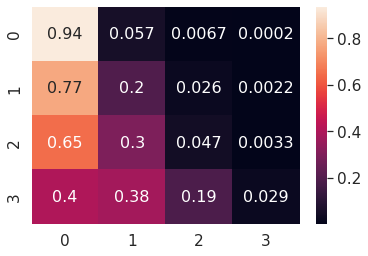

In [ ]:
# univariate d=1
cats = np.hstack(y_test)
predictions = np.hstack(y_pred)
predictions = np.digitize(predictions, bins=(1, 2, 3))
accuracy = accuracy_score(cats, predictions)
print("Tree accuracy is {:.5f}".format(accuracy))
# print('Misclassified samples: %d' % (Y_test != y_pred).sum())
print(classification_report(cats, predictions))

cm = confusion_matrix(cats, predictions, normalize='true')

sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={"size": 16})
plt.show()

Tree accuracy is 0.49616
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       836
           1       0.15      0.34      0.20       125
           2       0.06      0.39      0.11       101
           3       0.94      0.19      0.31       762

    accuracy                           0.50      1824
   macro avg       0.51      0.43      0.37      1824
weighted avg       0.82      0.50      0.54      1824



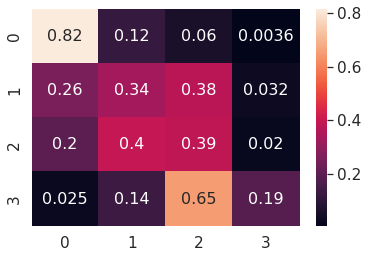

In [ ]:
# multivariate d=0
cats = np.hstack(y_test)
predictions = np.hstack(y_pred)
predictions = np.digitize(predictions, bins=(1, 2, 3))
accuracy = accuracy_score(cats, predictions)
print("Tree accuracy is {:.5f}".format(accuracy))
# print('Misclassified samples: %d' % (Y_test != y_pred).sum())
print(classification_report(cats, predictions))

cm = confusion_matrix(cats, predictions, normalize='true')

sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={"size": 16})
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

HORIZON = 12
training_window = 7 * 24

split_X_train = split_X_train[4000]
split_X_test = split_X_test[4000]

predictions = list()

order = (1, 0, 1) 
seasonal_order = (0, 1, 1, 24)

history = [x for x in split_X_train[0]['Passengers']]
history = history[(-training_window):]
model = SARIMAX(endog=history, order=order, seasonal_order=seasonal_order)

for train, test in zip(split_X_train,split_X_test):
  test_shifted = test.loc[:, test.columns.isin(["date","Passengers","Ezone_number"])]
  # test_shifted = test_shifted.set_index(['date'])

  for t in range(1, HORIZON+1):
      test_shifted['Passengers+'+str(t)] = test_shifted.groupby('Ezone_number')['Passengers'].shift(-t, fill_value=0)

  test_shifted = test_shifted.dropna(how='any')

  train_ts = train['Passengers']
  test_ts = test_shifted

  history = [x for x in train_ts]
  history = history[(-training_window):]



  for t in range(test_ts.shape[0]):
      model = model.clone(history)
      model_fit = model.fit()
      yhat = model_fit.forecast(steps = HORIZON)
      predictions.append(yhat)
      obs = list(test_ts.iloc[t])
      # move the training window
      history.append(obs[0])
      history.pop(0)
      print(test_ts.index[t])
      print(t+1, ': predicted =', yhat, 'expected =', obs)

<ipython-input-84-ad7f2ed7ad07>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_shifted['Passengers+'+str(t)] = test_shifted.groupby('Ezone_number')['Passengers'].shift(-t, fill_value=0)


24
1 : predicted = [ 1.08651171 -0.02131543 -0.01892478 -0.01682628 -0.01498752  0.88686554
  1.57061298  1.87868973  1.19854196  2.9911862   1.88140317  2.77633112] expected = [0, 4000, 0, 0, 0, 0, 0, 3, 3, 1, 3, 3, 3, 3]
25
2 : predicted = [-0.27221567 -0.24037803 -0.21226114 -0.18742977  0.71980594  1.49754424
  1.7917854   1.17360547  2.89943104  1.83203061  2.71613598  2.31433846] expected = [0, 4000, 0, 0, 0, 0, 3, 3, 1, 3, 3, 3, 3, 3]
26
3 : predicted = [-0.18037343 -0.15940761 -0.14087604  0.76115033  1.53200089  1.82269804
  1.19950566  2.92410001  1.85285935  2.73497147  2.33030232  2.95379534] expected = [0, 4000, 0, 0, 0, 3, 3, 1, 3, 3, 3, 3, 3, 3]
27
4 : predicted = [-0.12056884 -0.10654828  0.7916049   1.55826569  1.84610226  1.21975053
  2.94261425  1.86892528  2.74933577  2.34279131  2.96509019  1.8888059 ] expected = [0, 4000, 0, 0, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3]
28
5 : predicted = [-0.08086629  0.81429312  1.57843592  1.86390495  1.23556621  2.95649513
  1.88125005  2.

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


10824
49 : predicted = [0.52436663 0.35389671 0.18654676 0.16486236 0.14564888 0.55723976
 2.25641006 2.528705   1.51674516 3.07763412 2.21111358 2.63126543] expected = [0, 4000, 0, 0, 0, 0, 2, 3, 3, 3, 3, 3, 3, 3]
10825
50 : predicted = [0.21751076 0.0656504  0.0577483  0.05079971 0.47332985 2.18222641
 2.46319348 1.45896126 3.02679482 2.1664971  2.59221493 2.44690354] expected = [0, 4000, 0, 0, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3]
10826
51 : predicted = [0.00588579 0.00528872 0.00478094 0.43295978 2.14688322 2.43229918
 1.43203531 3.00332659 2.14610154 2.57460071 2.43175314 3.00321759] expected = [0, 4000, 0, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3]
10827
52 : predicted = [2.63704135e-04 4.23065304e-04 4.29197896e-01 2.14365034e+00
 2.42954013e+00 1.42970103e+00 3.00138234e+00 2.14451391e+00
 2.57333895e+00 2.43079736e+00 3.00254880e+00 2.71723135e+00] expected = [0, 4000, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
10828
53 : predicted = [-0.00555916  0.42401724  2.13919093  2.42573135  1.42648331  2.9987

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


37240
89 : predicted = [ 2.88604215e+00  2.82793005e+00  2.82763130e+00  1.61669807e+00
  1.56083464e+00  2.27439884e-04  1.39670481e-04  6.84649882e-05
  5.37894803e-06 -5.70691931e-05 -1.26285334e-04 -2.10478012e-04] expected = [3, 4000, 3, 3, 3, 3, 0, 0, 0, 1, 0, 0, 0, 0]
37241
90 : predicted = [ 2.81411516e+00  2.82390227e+00  1.61613787e+00  1.54990829e+00
 -1.36603232e-03  9.53228676e-04 -6.65319057e-04  4.64580936e-04
 -3.24713182e-04  2.27390029e-04 -1.59859995e-04  1.13275153e-04] expected = [3, 4000, 3, 3, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0]
37242
91 : predicted = [ 2.70347963e+00  1.65455555e+00  1.31568465e+00 -1.02412191e-02
  7.02836837e-03 -4.79713316e-03  3.23588846e-03 -2.12658338e-03
  1.31428708e-03 -6.85550347e-04  1.52560804e-04  6.46906915e-01] expected = [3, 4000, 3, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
37243
92 : predicted = [ 1.68913559e+00  1.21195566e+00 -4.45768178e-03  2.97109236e-03
 -1.97523827e-03  1.30563430e-03 -8.51681963e-04  5.38401941e-04
 -3.14049767e-04  1

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


42024
1 : predicted = [ 0.35912805 -0.17101551 -0.15380035 -0.13791164 -0.12321235 -0.1095757
  1.18749248  1.62232506  1.43444984  2.64288169  1.23089507  2.5743266 ] expected = [0, 4000, 0, 0, 0, 0, 0, 2, 3, 3, 3, 3, 3, 3]
42025
2 : predicted = [-0.12727199 -0.11709161 -0.10775686 -0.09920034 -0.09136025  1.20135425
  1.63420307  1.38673038  2.64505406  1.22445079  2.53254139  2.81041402] expected = [0, 4000, 0, 0, 0, 0, 2, 3, 3, 3, 3, 3, 3, 3]
42026
3 : predicted = [-0.07868639 -0.07261491 -0.06706515 -0.06199724  1.22816193  1.65866361
  1.40878527  2.66531348  1.24281865  2.54904719  2.82538469  2.27218347] expected = [0, 4000, 0, 0, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3]
42027
4 : predicted = [-0.04418529 -0.04113784 -0.03838212  1.249646    1.67821455  1.42578469
  2.68132933  1.2571842   2.56153203  2.83674364  2.28188317  1.8244576 ] expected = [0, 4000, 0, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3]
42028
5 : predicted = [-0.0171761  -0.01663788  1.26938713  1.69643308  1.43642426  2.69618264
  

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


54035
84 : predicted = [2.8282229  2.79669269 3.05481295 2.31663905 3.15262912 3.13436
 3.11846955 2.39039583 1.52121728 1.08237292 0.07359982 0.06606408] expected = [3, 4000, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0]
54036
85 : predicted = [2.83986642 3.09209143 2.34910325 3.18040505 3.15829892 3.13906117
 2.40807049 1.53618067 1.09512693 0.08447496 0.07518533 0.06725804] expected = [3, 4000, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 1]
54037
86 : predicted = [3.13330596 2.38467894 3.21116917 3.18483103 3.16190694 2.4276993
 1.55302702 1.10950468 0.09667123 0.08547388 0.07585532 0.35316822] expected = [3, 4000, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 1, 0]
54038
87 : predicted = [2.34997049 3.18117241 3.15886657 3.13946003 2.4083221  1.53638186
 1.09520263 0.08440751 0.07503405 0.06702994 0.34581731 0.05456782] expected = [3, 4000, 3, 3, 3, 3, 3, 0, 0, 0, 0, 1, 0, 0]
54039
88 : predicted = [3.23992221 3.20832995 3.18093487 2.45779862 1.44405496 1.02344846
 0.10333306 0.08997678 0.07843324 0.23779071 0.0598859

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


55232
105 : predicted = [1.31940734 2.73809208 2.60249931 2.67326634 2.68083833 2.85322327
 2.46565675 2.94735304 2.95205109 2.95618729 2.40314523 1.61501978] expected = [0, 4000, 3, 2, 3, 3, 3, 0, 1, 3, 3, 1, 0, 0]
55233
106 : predicted = [2.45589902 2.27648866 2.40627116 2.43268316 2.68069267 2.15272118
 2.83279384 2.84957453 2.86452371 2.24054264 1.42212767 0.44696648] expected = [3, 4000, 2, 3, 3, 3, 0, 1, 3, 3, 1, 0, 0, 0]
55234
107 : predicted = [ 2.43548116  2.53639779  2.55366247  2.7651873   2.30502957  2.88910602
  2.89989267  2.90943893  2.31828216  1.51214529  0.46502188 -0.06261528] expected = [2, 4000, 3, 3, 3, 0, 1, 3, 3, 1, 0, 0, 0, 0]
55235
108 : predicted = [ 2.36054923  2.39562998  2.64870259  2.13371844  2.81170965  2.83339503
  2.85263535  2.23561094  1.42185981  0.44411385 -0.08966105 -0.07899261] expected = [3, 4000, 3, 3, 0, 1, 3, 3, 1, 0, 0, 0, 0, 0]
55236
109 : predicted = [ 2.57874779  2.76940651  2.3753316   2.8864626   2.89936978  2.91080809
  2.35494294  1

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


66026
147 : predicted = [-4.09493379e-01 -4.03531222e-01 -3.97650367e-01 -7.56169040e-04
  2.30977572e-01  5.76348907e-01  8.01837838e-01  2.46854958e+00
  1.02846330e+00  2.32492791e+00  1.93226837e+00  1.70258281e+00] expected = [0, 4000, 0, 0, 2, 3, 0, 1, 0, 3, 3, 3, 3, 3]
66027
148 : predicted = [-0.35952537 -0.35340726  0.04006649  0.26833503  0.61179625  0.83639891
  2.51606835  1.05917488  2.36667405  1.97560498  1.73717024  2.26139788] expected = [0, 4000, 0, 2, 3, 0, 1, 0, 3, 3, 3, 3, 3, 3]
66028
149 : predicted = [-0.31317343  0.07780461  0.30355436  0.64557387  0.86947323  2.55822307
  1.08935193  2.40455726  2.01454932  1.76977893  2.30013996  2.74810923] expected = [0, 4000, 2, 3, 0, 1, 0, 3, 3, 3, 3, 3, 3, 3]
66029
150 : predicted = [0.11163162 0.33563426 0.67659508 0.89992111 2.59444232 1.11767605
 2.43775477 2.04832425 1.79929416 2.33353126 2.7824053  1.81401691] expected = [2, 4000, 3, 0, 1, 0, 3, 3, 3, 3, 3, 3, 3, 3]
66030
151 : predicted = [0.55123461 0.89331437 1.11

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


76842
43 : predicted = [2.2550461  1.52649817 0.37124084 0.0747521  0.06539913 0.3430037
 0.05026923 0.04420464 0.0389805  0.03449748 0.03067035 0.88456894] expected = [3, 4000, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
76843
44 : predicted = [1.75979504 0.57466457 0.25195679 0.21962268 0.47702647 0.16654651
 0.14482874 0.1257734  0.10903021 0.09429136 0.93840706 2.21267319] expected = [3, 4000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
76844
45 : predicted = [0.86424292 0.5067783  0.44386815 0.67441344 0.34031092 0.29785764
 0.26059947 0.22788656 0.19914835 1.03102549 2.2945105  2.84635099] expected = [0, 4000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
76845
46 : predicted = [0.2745875  0.24055947 0.49644964 0.18459403 0.16167859 0.14158859
 0.12397296 0.10852383 0.95211404 2.22593536 2.78692287 2.49203697] expected = [0, 4000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3]
76846
47 : predicted = [0.17373264 0.43751487 0.13262596 0.11586021 0.10119892 0.08837577
 0.07715784 0.92448409 2.20160534 2.76550756 2.4731

In [ ]:
# eval_df = pd.DataFrame(predictions, columns=['t+'+str(t) for t in range(1, HORIZON+1)])
# # eval_df['timestamp'] = test.index[0:len(test)-HORIZON+1]
# eval_df = pd.melt(eval_df, id_vars='timestamp', value_name='prediction', var_name='h')
# eval_df['actual'] = np.array(np.transpose(test_ts)).ravel()
# eval_df[['prediction', 'actual']] = scaler.inverse_transform(eval_df[['prediction', 'actual']])
# eval_df.head()

ValueError: ignored

Tree accuracy is 0.53070
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       836
           1       0.19      0.40      0.26       125
           2       0.07      0.40      0.12       101
           3       0.97      0.25      0.40       762

    accuracy                           0.53      1824
   macro avg       0.53      0.47      0.41      1824
weighted avg       0.83      0.53      0.58      1824



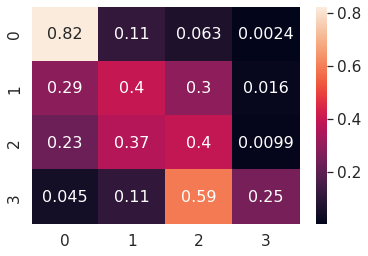

In [ ]:
# walk forward
cats = test_ts.Passengers
predictions = eval_df['t+1']
predictions = np.digitize(predictions, bins=(1, 2, 3))
accuracy = accuracy_score(cats, predictions)
print("Tree accuracy is {:.5f}".format(accuracy))
# print('Misclassified samples: %d' % (Y_test != y_pred).sum())
print(classification_report(cats, predictions))

cm = confusion_matrix(cats, predictions, normalize='true')

sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={"size": 16})
plt.show()

In [ ]:

print('One step forecast MAPE: ', 
      (mean_absolute_percentage_error(test_ts.Passengers,eval_df['t+1']))*100, '%')

One step forecast MAPE:  inf %


<ipython-input-95-199972fad748>:3: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
len(test_ts)

1824

In [ ]:
test_ts

,Passengers,Ezone_number,Passengers+1,Passengers+2,Passengers+3,Passengers+4,Passengers+5,Passengers+6,Passengers+7,Passengers+8,Passengers+9,Passengers+10,Passengers+11,Passengers+12
0,0,4000,0,0,0,0,0,3,3,1,3,3,3,3
1,0,4000,0,0,0,0,3,3,1,3,3,3,3,3
2,0,4000,0,0,0,3,3,1,3,3,3,3,3,3
3,0,4000,0,0,3,3,1,3,3,3,3,3,3,3
4,0,4000,0,3,3,1,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,3,4000,0,0,0,0,0,0,0,0,0,0,0,0
1820,0,4000,0,0,0,0,0,0,0,0,0,0,0,0
1821,0,4000,0,0,0,0,0,0,0,0,0,0,0,0
1822,0,4000,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_ts = pd.DataFrame()
for train, test in zip(split_X_train,split_X_test):
  
  test_shifted = test.loc[:, test.columns.isin(["date","Passengers","Ezone_number"])]
  # test_shifted = test_shifted.set_index(['date'])

  for t in range(1, HORIZON+1):
      test_shifted['Passengers+'+str(t)] = test_shifted.groupby('Ezone_number')['Passengers'].shift(-t, fill_value=0)

  test_shifted = test_shifted.dropna(how='any')
  print(len(test_shifted))
  test_ts = test_ts.append(test_shifted, ignore_index=True)

<ipython-input-110-301c70571bf6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_shifted['Passengers+'+str(t)] = test_shifted.groupby('Ezone_number')['Passengers'].shift(-t, fill_value=0)


168
168
168
168
168
168
168
168
168
168
96
48


# ARIMA

In [ ]:
df = X_train.append(X_test, ignore_index=True)
df

,date,hour,Passengers,weekday,is_holiday,Ezone_number,Ezone_lat,Ezone_long,temperature,The one hour precipitation total in mm,The weather condition code,route_count,distance to ZOB,distance to Römerplatz,month
0,2019-01-01 00:00:00,0,0,1,True,15964,48.604788,13.483832,7.8,0.0,4,6,4.138867,4.138867,1
1,2019-01-01 01:00:00,1,0,1,True,15964,48.604788,13.483832,6.9,0.0,4,6,4.138867,4.138867,1
2,2019-01-01 02:00:00,2,0,1,True,15964,48.604788,13.483832,6.6,0.0,4,6,4.138867,4.138867,1
3,2019-01-01 03:00:00,3,0,1,True,15964,48.604788,13.483832,6.2,0.0,4,6,4.138867,4.138867,1
4,2019-01-01 04:00:00,4,0,1,True,15964,48.604788,13.483832,5.9,0.0,3,6,4.138867,4.138867,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420045,2019-12-16 19:00:00,19,0,0,False,9750,48.574233,13.450428,6.3,0.4,7,1,0.444588,0.444588,12
420046,2019-12-16 20:00:00,20,0,0,False,9750,48.574233,13.450428,6.3,0.8,7,1,0.444588,0.444588,12
420047,2019-12-16 21:00:00,21,0,0,False,9750,48.574233,13.450428,6.1,0.7,7,1,0.444588,0.444588,12
420048,2019-12-16 22:00:00,22,0,0,False,9750,48.574233,13.450428,6.0,0.4,7,1,0.444588,0.444588,12


In [ ]:
# !pip install pmdarima
from pmdarima.arima import ADFTest

adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(df.Passengers)

ImportError: ignored

In [ ]:
# !pip3 install pyramid-arima
!pip install pmdarima
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# import statsmodels.tsa.arima.model
from pmdarima.arima import auto_arima


# # Seasonal - fit stepwise auto-ARIMA

Y_train = np.digitize(split_X_train[0].Passengers, bins=(1, 2, 3))
smodel = auto_arima(Y_train, start_p=1, start_q=1,
                         test='adf',
                         max_p=5, max_q=5, m=24,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()




# predictions = []
# for train, test in zip(split_X_train,split_X_test):
#   Y_train = np.digitize(train.Passengers, bins=(1, 2, 3))
#   Y_test = np.digitize(test.Passengers, bins=(1, 2, 3))
  
#   model = ARIMA(Y_train, order=(12,0,12))
#   model_fit = model.fit()
  
#   predictions.append(model.predict(test))

# print(model_fit.summary())

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[24] intercept   : AIC=inf, Time=303.34 sec
 ARIMA(0,0,0)(0,1,0)[24] intercept   : AIC=69460.807, Time=30.99 sec


Performing stepwise search to minimize aic